In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

from utils import summarize_df, plot_signals_p_value, plot_signals_auc, plot_signals_gini, plot_conf_int, plot_correction
from utils import plot_AUC,plot_signals_youden, plot_signals_roc01, summarize_thresholds, summarize_thresholds2, summarize_sen_spe
from statsmodels.stats.multitest import multipletests

In [2]:
infections = pd.read_csv('epi_data_age_gender.csv')
healthy_idxs = list(infections[infections.Group == 'HC'].ID)
inf_idxs = list(infections[(infections.Group != 'HC') & (infections.Infection == 'Yes')].ID)
data = pd.read_excel('S1File.xlsx', sheet_name = 'CFS_JPT_Seroarray')
data = data.iloc[1254:1270]
data = data[list(data.columns[:8])+healthy_idxs+inf_idxs]

# Signals

In [3]:
smr, all_lower_bounds, all_p_values, auc, gini, x_plot, y_plot, youden, roc01 = summarize_df(data, 8, 58)

**Chi-squared**

In [4]:
smr_p_value = smr[['name', 'min_p_value', 'test_lower_bound', 'test_upper_bound']]
smr_p_value.columns = ['ID', 'minimum p-value', 'lower bound', 'upper bound']
smr_p_value.iloc[:, 2:] = np.round(smr_p_value.iloc[:, 2:], 3)
smr_p_value

ID  minimum p-value  lower bound  upper bound
0               EBNA1_0415 (AG876)         0.054151     1008.333     1032.667
1               EBNA1_0415 (B95-8)         0.111303      939.000      964.333
2               EBNA1_0419 (AG876)         0.026763      780.667      783.667
3          EBNA1_0419 (B95-8, GD1)         0.018459      985.000     1000.667
4               EBNA1_0423 (AG876)         0.094512      821.000      828.500
5          EBNA1_0423 (B95-8, GD1)         0.011665      905.000      913.000
6                 EBNA1_0427 (GD1)         0.066203      928.667      976.667
7        EBNA1_0430 (AG876, B95-8)         0.064985     1000.000     1001.000
8                 EBNA1_0431 (GD1)         0.001510      933.000      935.333
9        EBNA1_0434 (AG876, B95-8)         0.002915      923.333      931.333
10                EBNA1_0435 (GD1)         0.001785      819.667      824.000
11  EBNA1_0440 (AG876, B95-8, GD1)         0.054475      805.000      830.667
12  EBNA1_0444 (AG876, B95-8, GD1)         0.040415      844.333      850.333
13  EBNA1_0448 (AG876, B95-8, GD1)         0.000607      836.500      839.000
14              EBNA1_0452 (AG876)         0.008726     2270.000     2301.000
15         EBNA1_0452 (B95-8, GD1)         0.010632     1269.667     1298.000

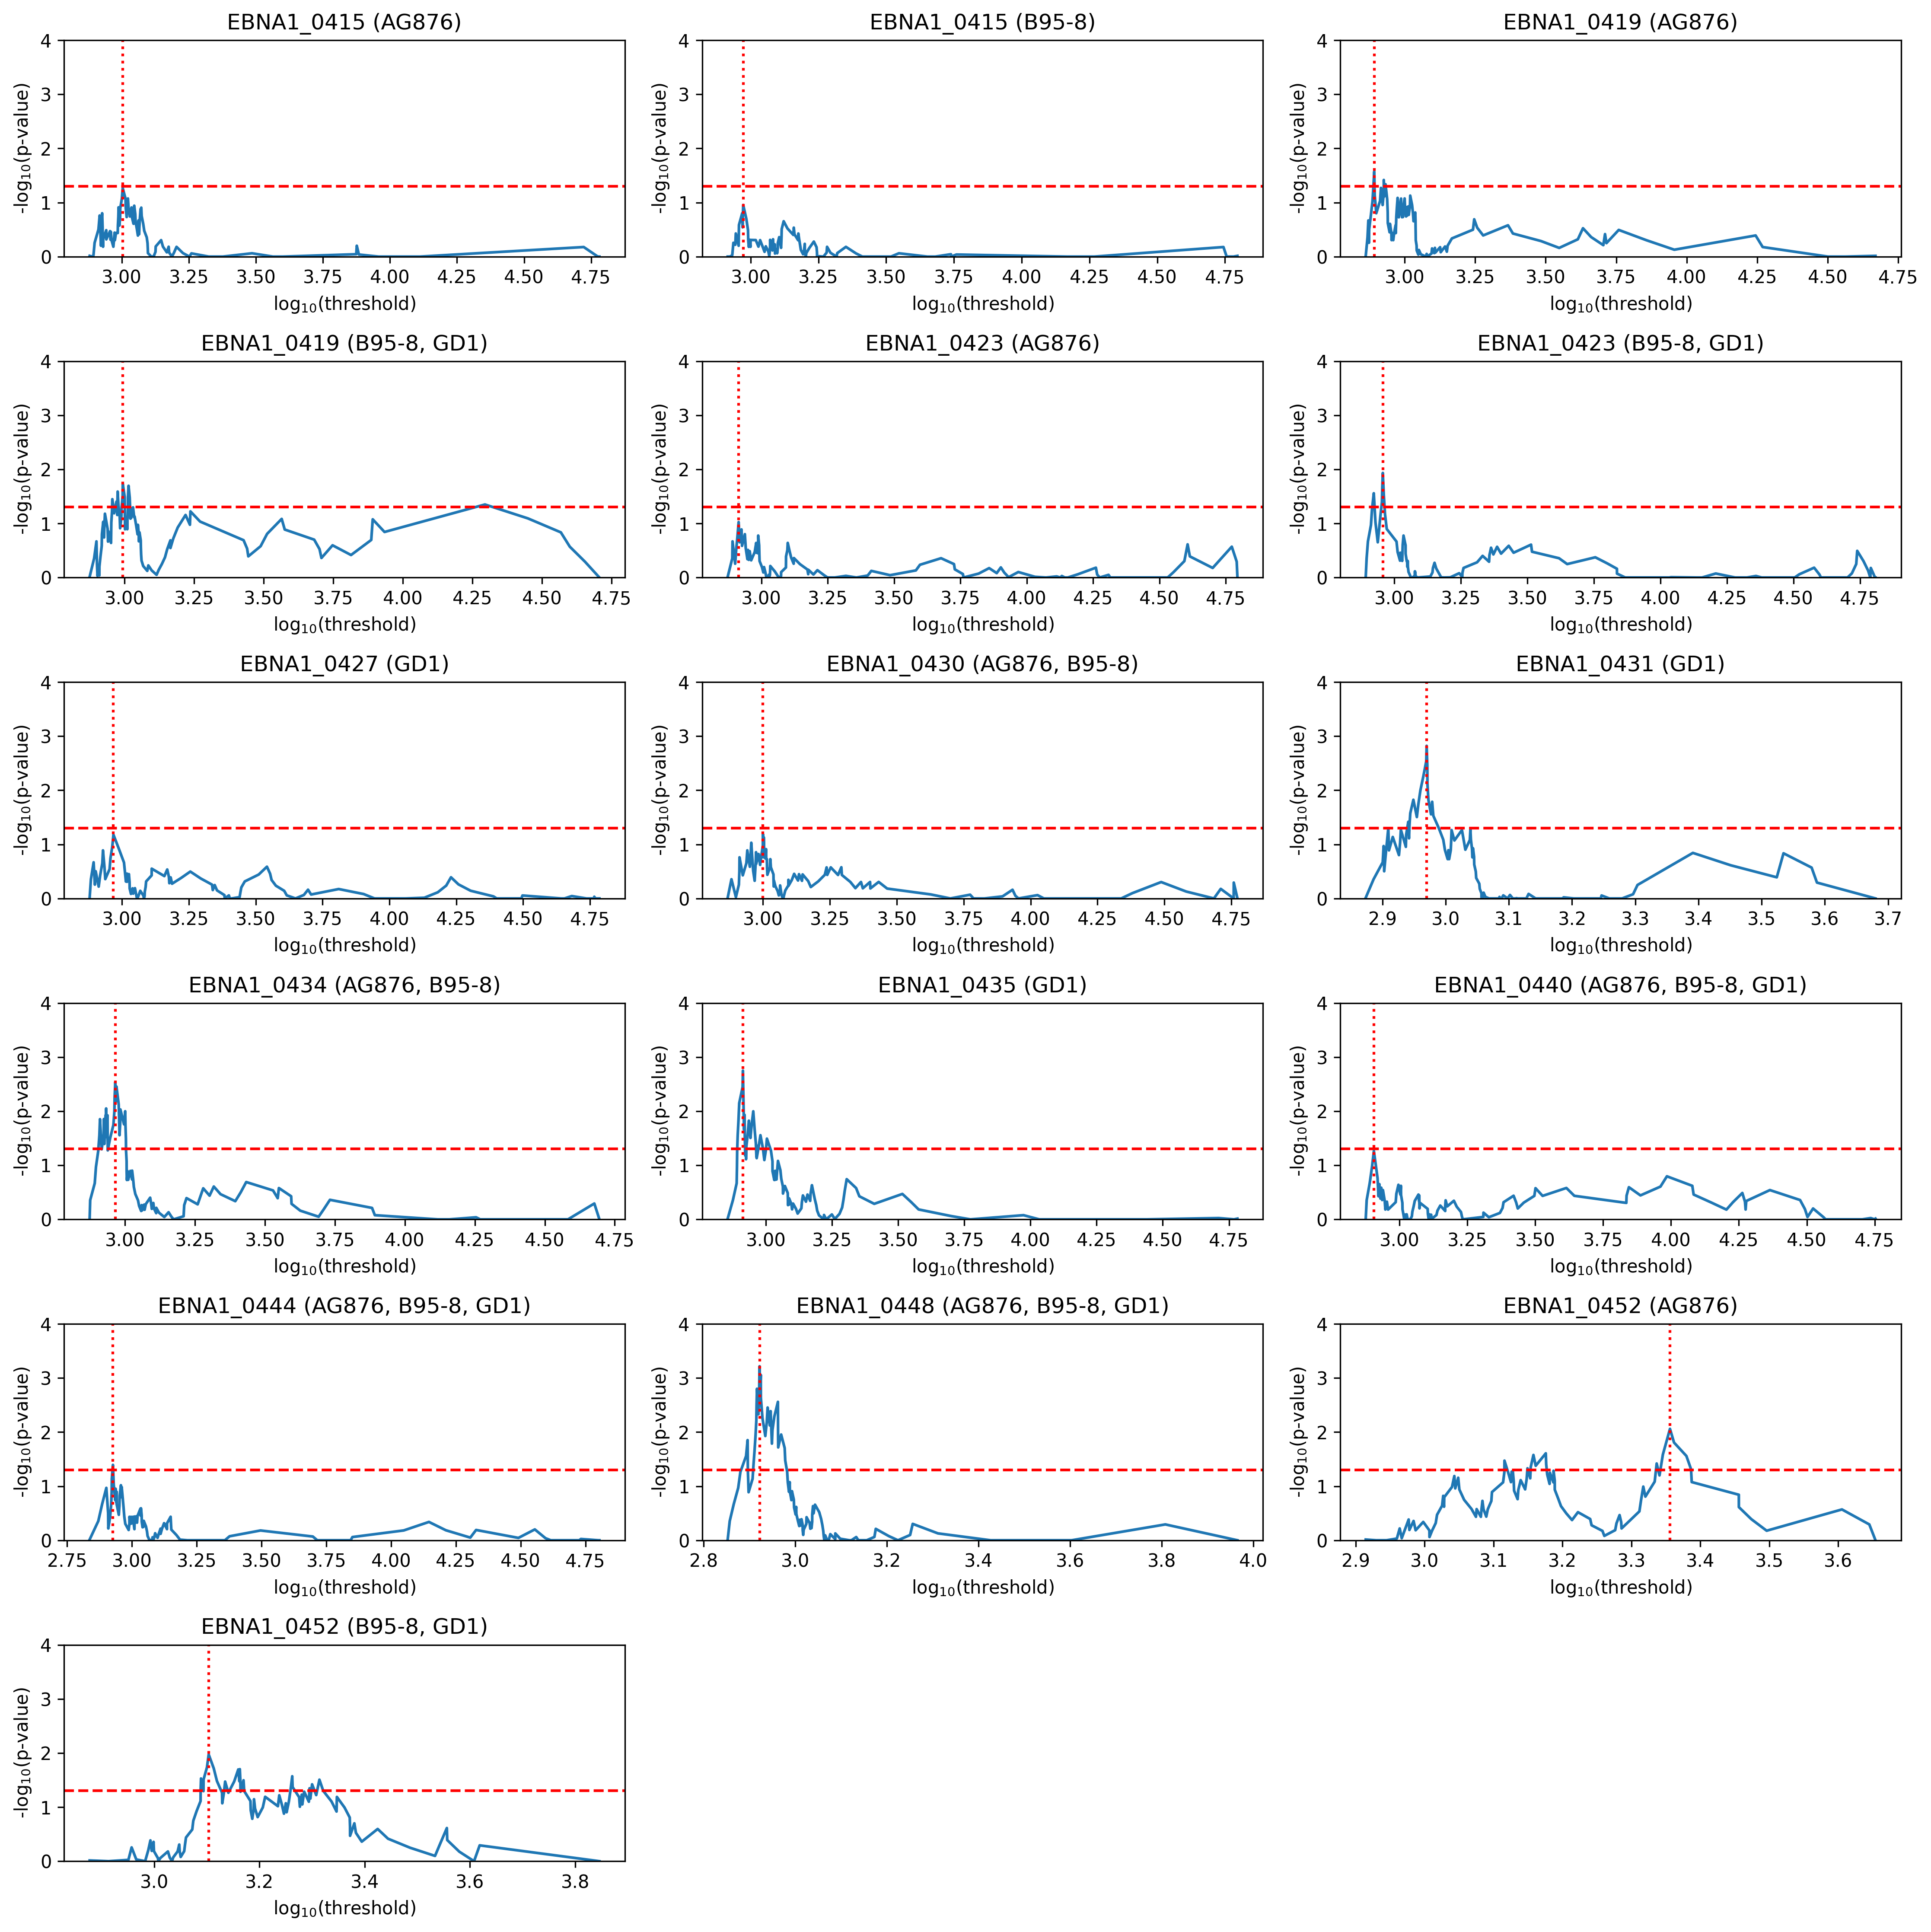

In [5]:
plot_signals_p_value(smr, all_lower_bounds, all_p_values)

**ROC with AUC**

In [6]:
smr_roc = smr[['name', 'AUC_total', 'min_roc01', 'max_youden', 'min_dist']]
smr_roc.columns = ['ID', 'AUC', 'ROC01', "Youden's J-statistic", '|Sen-Spe|']
smr_roc.iloc[:, 1:] = np.round(smr_roc.iloc[:, 1:], 3)
smr_roc

ID    AUC  ROC01  Youden's J-statistic  \
0               EBNA1_0415 (AG876)  0.574  0.584                 0.202   
1               EBNA1_0415 (B95-8)  0.546  0.613                 0.139   
2               EBNA1_0419 (AG876)  0.599  0.571                 0.194   
3          EBNA1_0419 (B95-8, GD1)  0.630  0.541                 0.245   
4               EBNA1_0423 (AG876)  0.520  0.689                 0.133   
5          EBNA1_0423 (B95-8, GD1)  0.547  0.636                 0.183   
6                 EBNA1_0427 (GD1)  0.516  0.648                 0.146   
7        EBNA1_0430 (AG876, B95-8)  0.528  0.634                 0.175   
8                 EBNA1_0431 (GD1)  0.595  0.563                 0.289   
9        EBNA1_0434 (AG876, B95-8)  0.613  0.577                 0.270   
10                EBNA1_0435 (GD1)  0.610  0.579                 0.229   
11  EBNA1_0440 (AG876, B95-8, GD1)  0.526  0.642                 0.132   
12  EBNA1_0444 (AG876, B95-8, GD1)  0.536  0.622                 0.152   
13  EBNA1_0448 (AG876, B95-8, GD1)  0.623  0.552                 0.295   
14              EBNA1_0452 (AG876)  0.622  0.548                 0.237   
15         EBNA1_0452 (B95-8, GD1)  0.631  0.536                 0.258   

    |Sen-Spe|  
0       0.202  
1       0.139  
2       0.194  
3       0.245  
4       0.133  
5       0.183  
6       0.146  
7       0.175  
8       0.289  
9       0.270  
10      0.229  
11      0.132  
12      0.152  
13      0.295  
14      0.237  
15      0.258

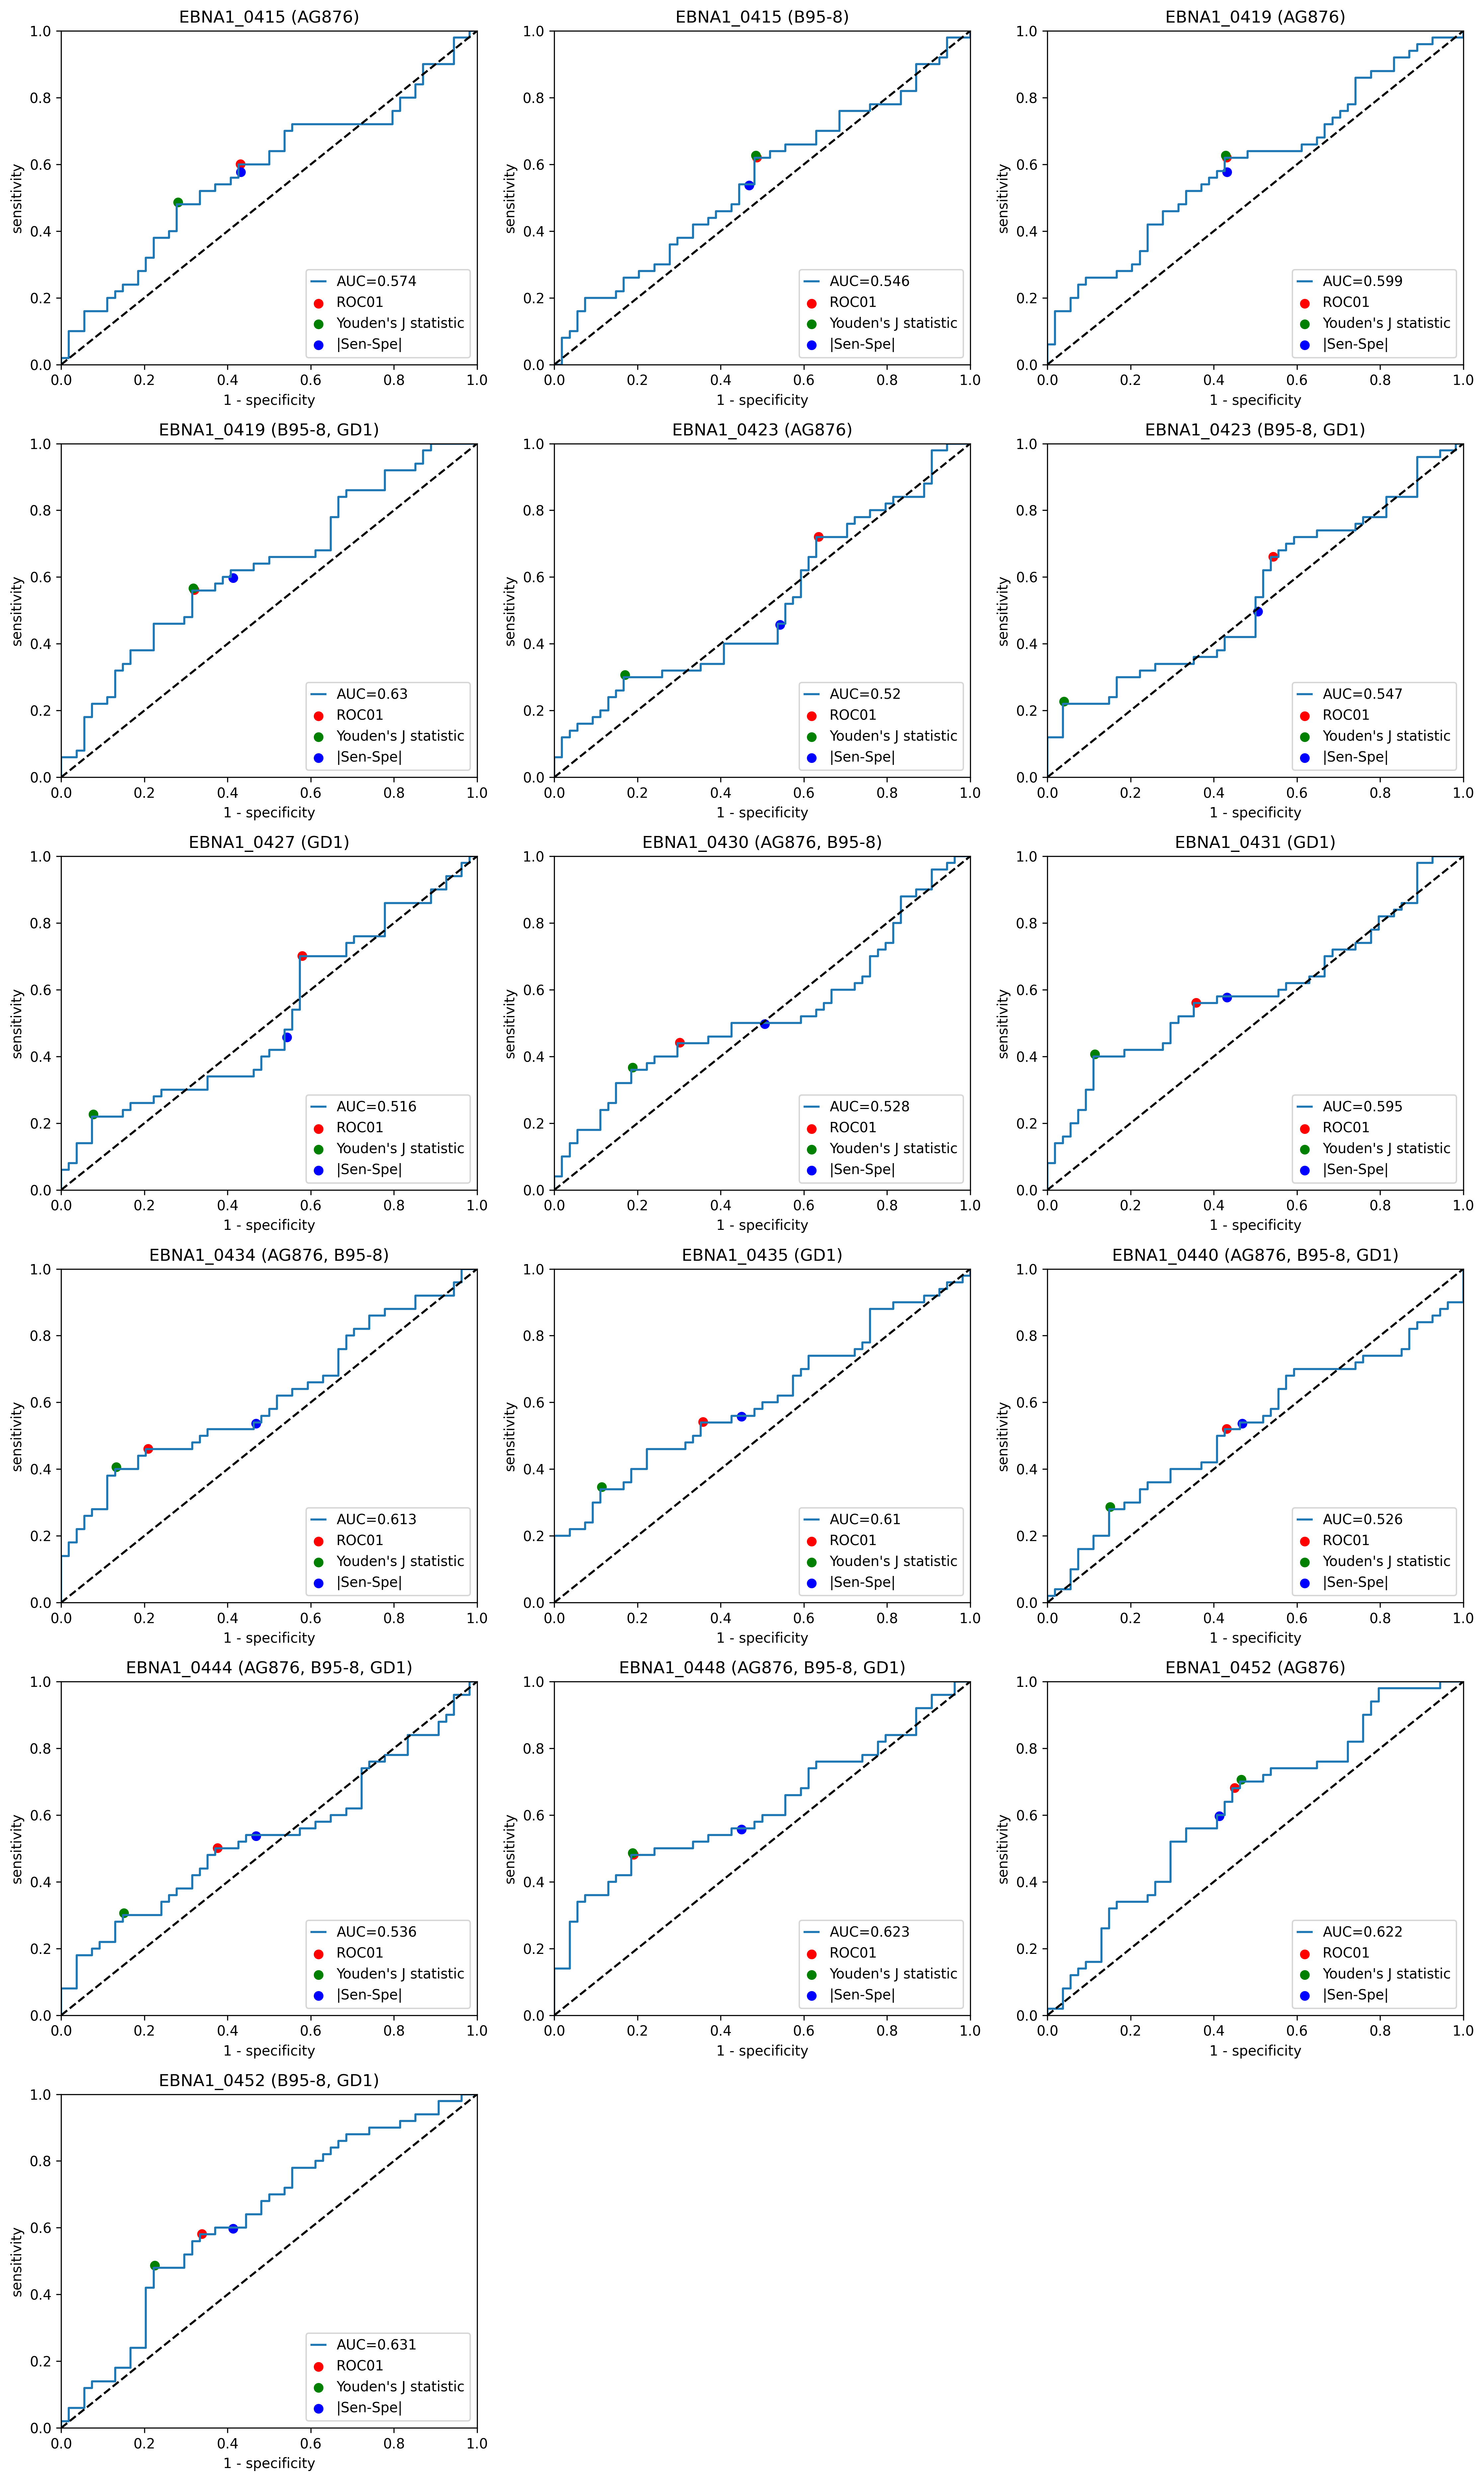

In [7]:
plot_AUC(smr, x_plot, y_plot)

**Youden**

In [8]:
smr_youden = smr[['name', 'max_youden', 'youden_lower_bound', 'youden_upper_bound']]
smr_youden.columns = ['ID', "Youden's J statistic", 'lower bound', 'upper bound']
smr_youden.iloc[:, 1:] = np.round(smr_youden.iloc[:, 1:], 3)
smr_youden

ID  Youden's J statistic  lower bound  \
0               EBNA1_0415 (AG876)                 0.202     1008.333   
1               EBNA1_0415 (B95-8)                 0.139     1324.000   
2               EBNA1_0419 (AG876)                 0.194     1047.000   
3          EBNA1_0419 (B95-8, GD1)                 0.245     1033.333   
4               EBNA1_0423 (AG876)                 0.133      973.000   
5          EBNA1_0423 (B95-8, GD1)                 0.183      905.000   
6                 EBNA1_0427 (GD1)                 0.146      928.667   
7        EBNA1_0430 (AG876, B95-8)                 0.175     1006.667   
8                 EBNA1_0431 (GD1)                 0.289      933.000   
9        EBNA1_0434 (AG876, B95-8)                 0.270      932.333   
10                EBNA1_0435 (GD1)                 0.229      897.000   
11  EBNA1_0440 (AG876, B95-8, GD1)                 0.132     9660.000   
12  EBNA1_0444 (AG876, B95-8, GD1)                 0.152      912.667   
13  EBNA1_0448 (AG876, B95-8, GD1)                 0.295      917.333   
14              EBNA1_0452 (AG876)                 0.237     1499.333   
15         EBNA1_0452 (B95-8, GD1)                 0.258     1269.667   

    upper bound  
0      1032.667  
1      1367.000  
2      1063.000  
3      1043.333  
4       981.000  
5       913.000  
6       976.667  
7      1009.667  
8       935.333  
9       949.667  
10      907.000  
11    11982.000  
12      921.333  
13      917.667  
14     1501.333  
15     1298.000

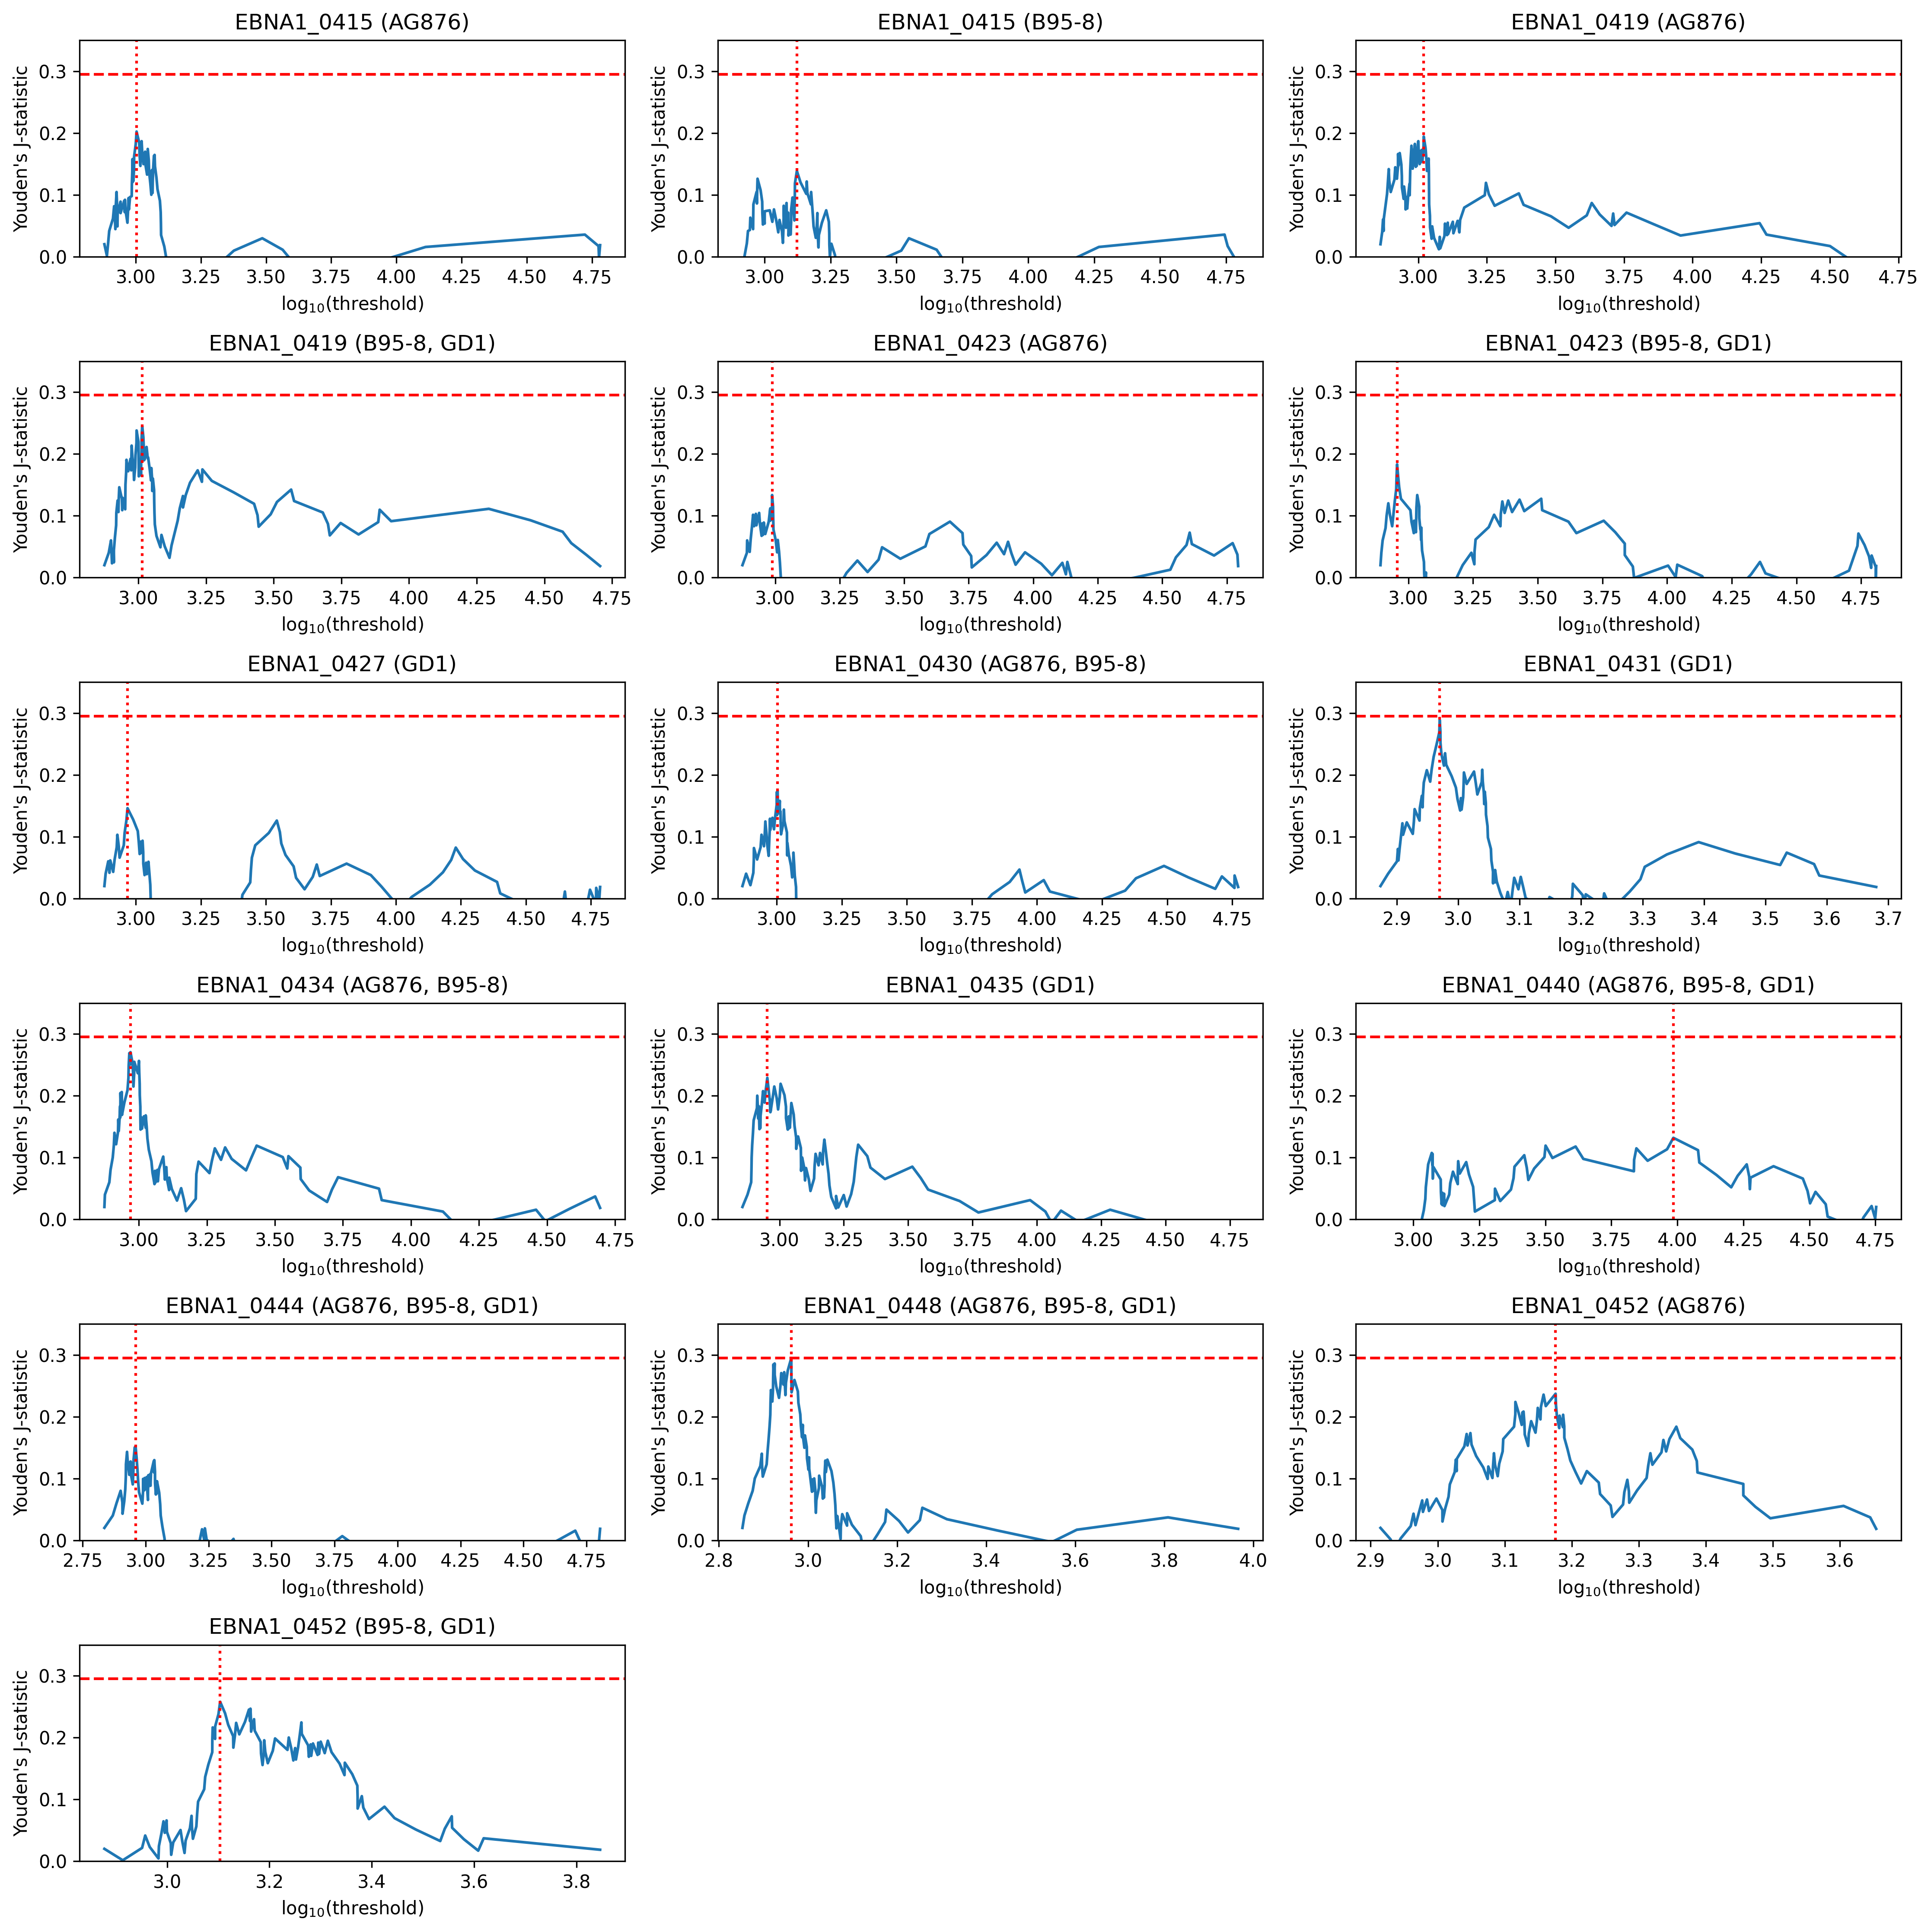

In [9]:
plot_signals_youden(smr, all_lower_bounds, youden)

**ROC 01**

In [10]:
smr_roc01 = smr[['name', 'min_roc01', 'roc01_lower_bound', 'roc01_upper_bound']]
smr_roc01.columns = ['ID', "ROC01", 'lower bound', 'upper bound']
smr_roc01.iloc[:, 1:] = np.round(smr_roc01.iloc[:, 1:], 3)
smr_roc01

ID  ROC01  lower bound  upper bound
0               EBNA1_0415 (AG876)  0.584     1113.000     1123.000
1               EBNA1_0415 (B95-8)  0.613     1324.000     1367.000
2               EBNA1_0419 (AG876)  0.571     1047.000     1063.000
3          EBNA1_0419 (B95-8, GD1)  0.541     1033.333     1043.333
4               EBNA1_0423 (AG876)  0.689     4755.667     5320.000
5          EBNA1_0423 (B95-8, GD1)  0.636     2309.000     2356.000
6                 EBNA1_0427 (GD1)  0.648     3483.000     3578.667
7        EBNA1_0430 (AG876, B95-8)  0.634     1065.000     1070.000
8                 EBNA1_0431 (GD1)  0.563     1094.333     1096.333
9        EBNA1_0434 (AG876, B95-8)  0.577     1001.667     1004.000
10                EBNA1_0435 (GD1)  0.579     1112.000     1112.000
11  EBNA1_0440 (AG876, B95-8, GD1)  0.642     1479.333     1499.667
12  EBNA1_0444 (AG876, B95-8, GD1)  0.622     1083.333     1090.000
13  EBNA1_0448 (AG876, B95-8, GD1)  0.552      917.333      917.667
14              EBNA1_0452 (AG876)  0.548     1438.667     1449.667
15         EBNA1_0452 (B95-8, GD1)  0.536     1455.000     1458.333

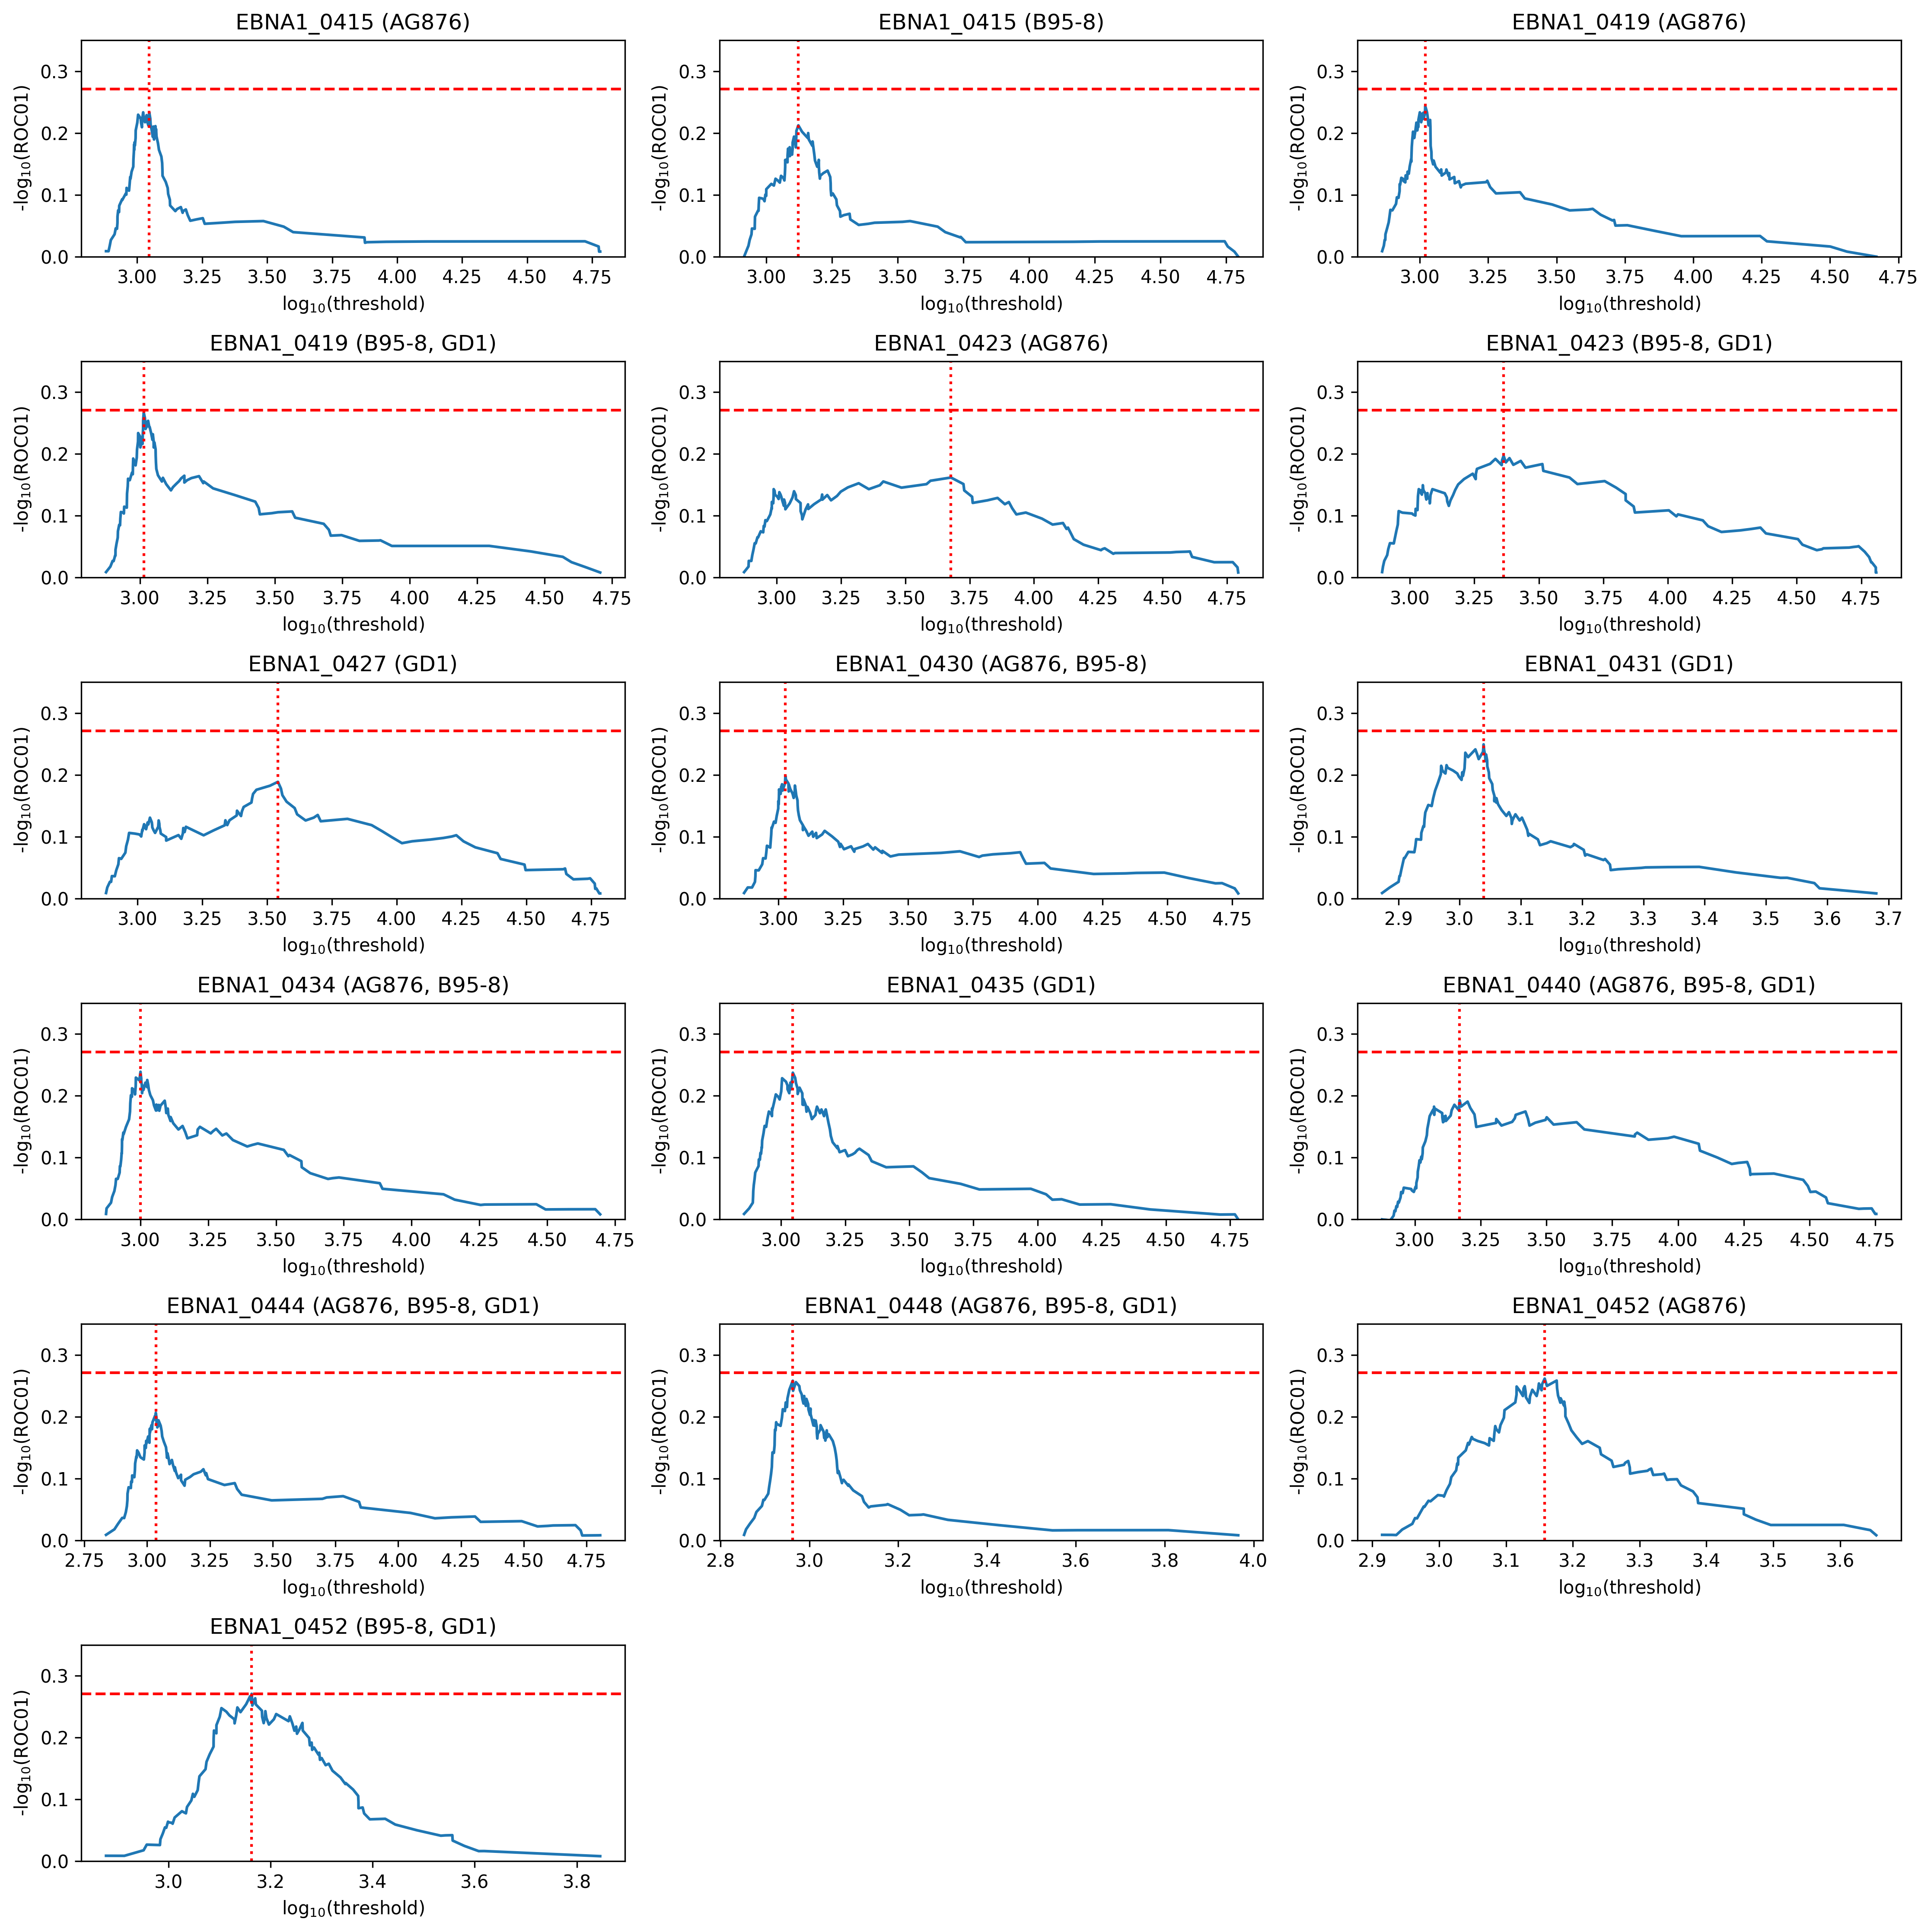

In [11]:
plot_signals_roc01(smr, all_lower_bounds, roc01)

**AUC (single threshold)**

In [12]:
smr_auc = smr[['name', 'max_auc', 'auc_lower_bound', 'auc_upper_bound']]
smr_auc.columns = ['ID', 'maximum AUC', 'lower bound', 'upper bound']
smr_auc.iloc[:, 2:] = np.round(smr_auc.iloc[:, 2:], 3)
smr_auc

ID  maximum AUC  lower bound  upper bound
0               EBNA1_0415 (AG876)     0.601111     1008.333     1032.667
1               EBNA1_0415 (B95-8)     0.569259     1324.000     1367.000
2               EBNA1_0419 (AG876)     0.597037     1047.000     1063.000
3          EBNA1_0419 (B95-8, GD1)     0.622593     1033.333     1043.333
4               EBNA1_0423 (AG876)     0.568519     1257.333     1276.333
5          EBNA1_0423 (B95-8, GD1)     0.591481      905.000      913.000
6                 EBNA1_0427 (GD1)     0.572963      928.667      976.667
7        EBNA1_0430 (AG876, B95-8)     0.587407     1006.667     1009.667
8                 EBNA1_0431 (GD1)     0.644444      933.000      935.333
9        EBNA1_0434 (AG876, B95-8)     0.635185      932.333      949.667
10                EBNA1_0435 (GD1)     0.614444      897.000      907.000
11  EBNA1_0440 (AG876, B95-8, GD1)     0.565926     9660.000    11982.000
12  EBNA1_0444 (AG876, B95-8, GD1)     0.575926      912.667      921.333
13  EBNA1_0448 (AG876, B95-8, GD1)     0.647407      917.333      917.667
14              EBNA1_0452 (AG876)     0.618519     1499.333     1501.333
15         EBNA1_0452 (B95-8, GD1)     0.628889     1269.667     1298.000

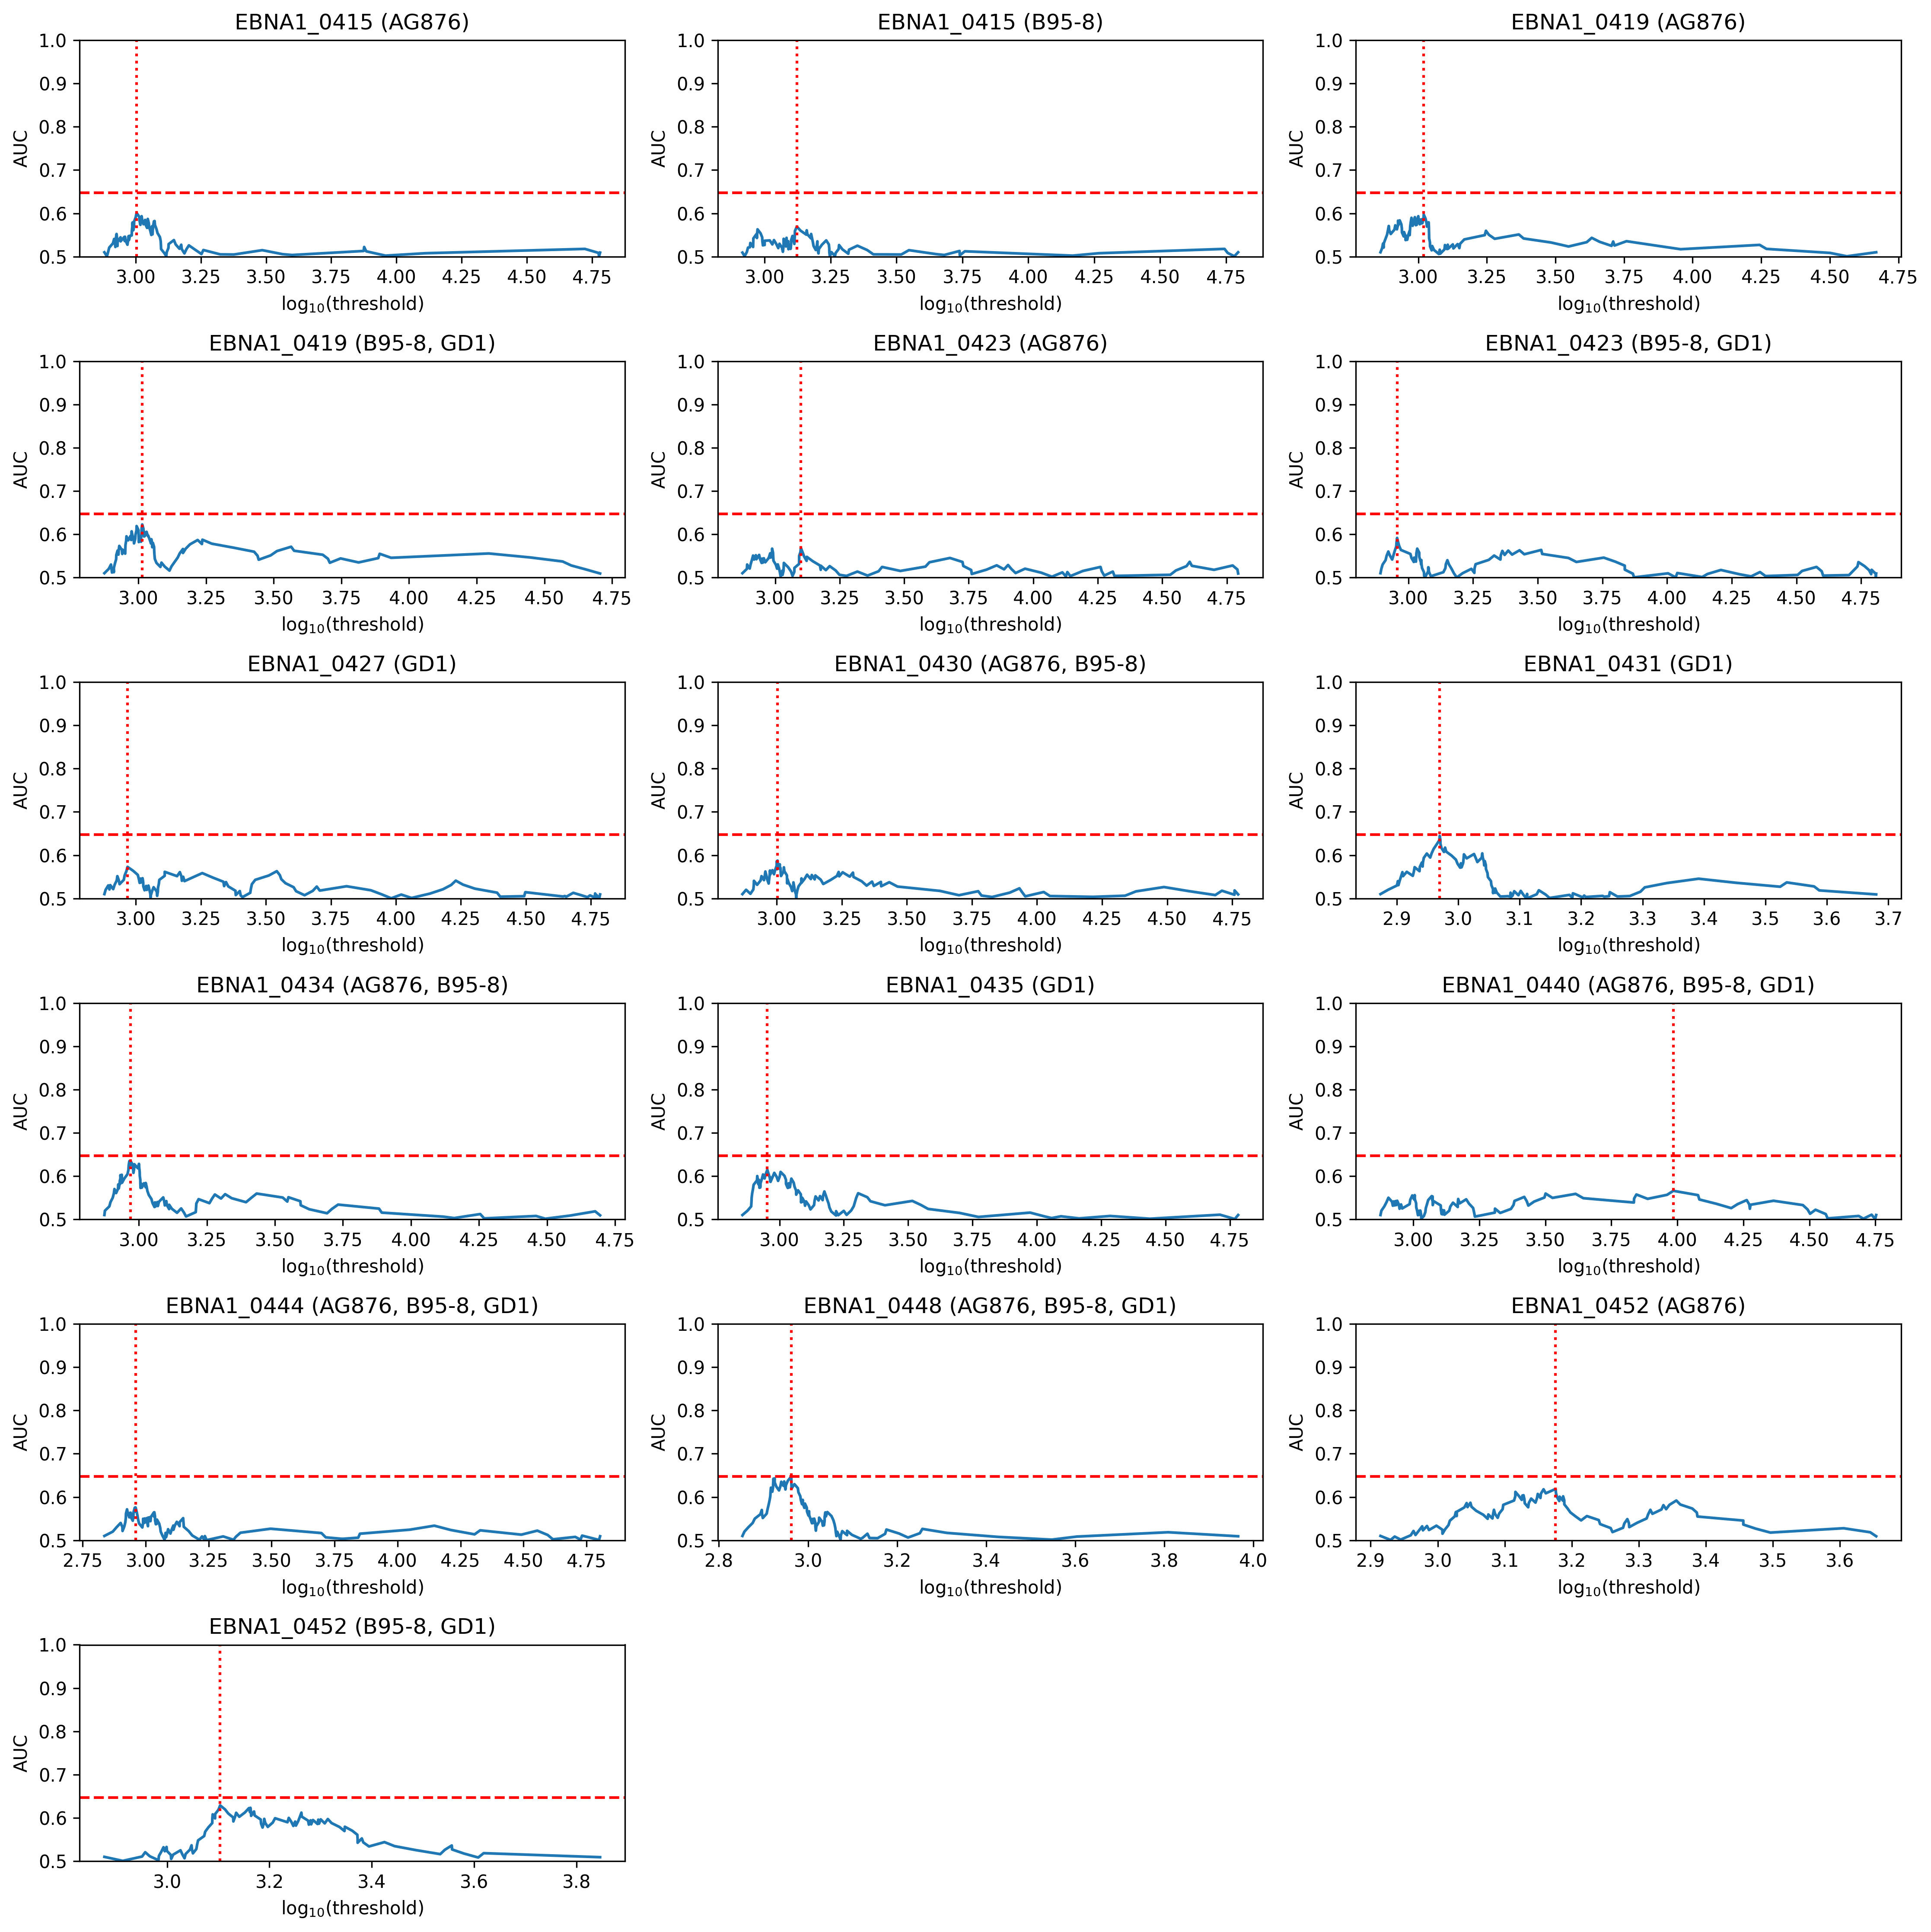

In [13]:
plot_signals_auc(smr, all_lower_bounds, auc)

**Gini decrease**

In [14]:
smr_gini = smr[['name', 'max_gini', 'gini_lower_bound', 'gini_upper_bound']]
smr_gini.columns = ['ID', 'maximum Gini decrease', 'lower bound', 'upper bound']
smr_gini.iloc[:, 2:] = np.round(smr_gini.iloc[:, 2:], 3)
smr_gini

ID  maximum Gini decrease  lower bound  \
0               EBNA1_0415 (AG876)               0.021746     1008.333   
1               EBNA1_0415 (B95-8)               0.016965      939.000   
2               EBNA1_0419 (AG876)               0.031559      780.667   
3          EBNA1_0419 (B95-8, GD1)               0.031558      985.000   
4               EBNA1_0423 (AG876)               0.020445      821.000   
5          EBNA1_0423 (B95-8, GD1)               0.038145      905.000   
6                 EBNA1_0427 (GD1)               0.021502      928.667   
7        EBNA1_0430 (AG876, B95-8)               0.020735     1000.000   
8                 EBNA1_0431 (GD1)               0.055473      933.000   
9        EBNA1_0434 (AG876, B95-8)               0.049348      923.333   
10                EBNA1_0435 (GD1)               0.057362      819.667   
11  EBNA1_0440 (AG876, B95-8, GD1)               0.027232      805.000   
12  EBNA1_0444 (AG876, B95-8, GD1)               0.026932      844.333   
13  EBNA1_0448 (AG876, B95-8, GD1)               0.064920      836.500   
14              EBNA1_0452 (AG876)               0.041206     2270.000   
15         EBNA1_0452 (B95-8, GD1)               0.036591     1269.667   

    upper bound  
0      1032.667  
1       964.333  
2       783.667  
3      1000.667  
4       828.500  
5       913.000  
6       976.667  
7      1001.000  
8       935.333  
9       931.333  
10      824.000  
11      830.667  
12      850.333  
13      839.000  
14     2301.000  
15     1298.000

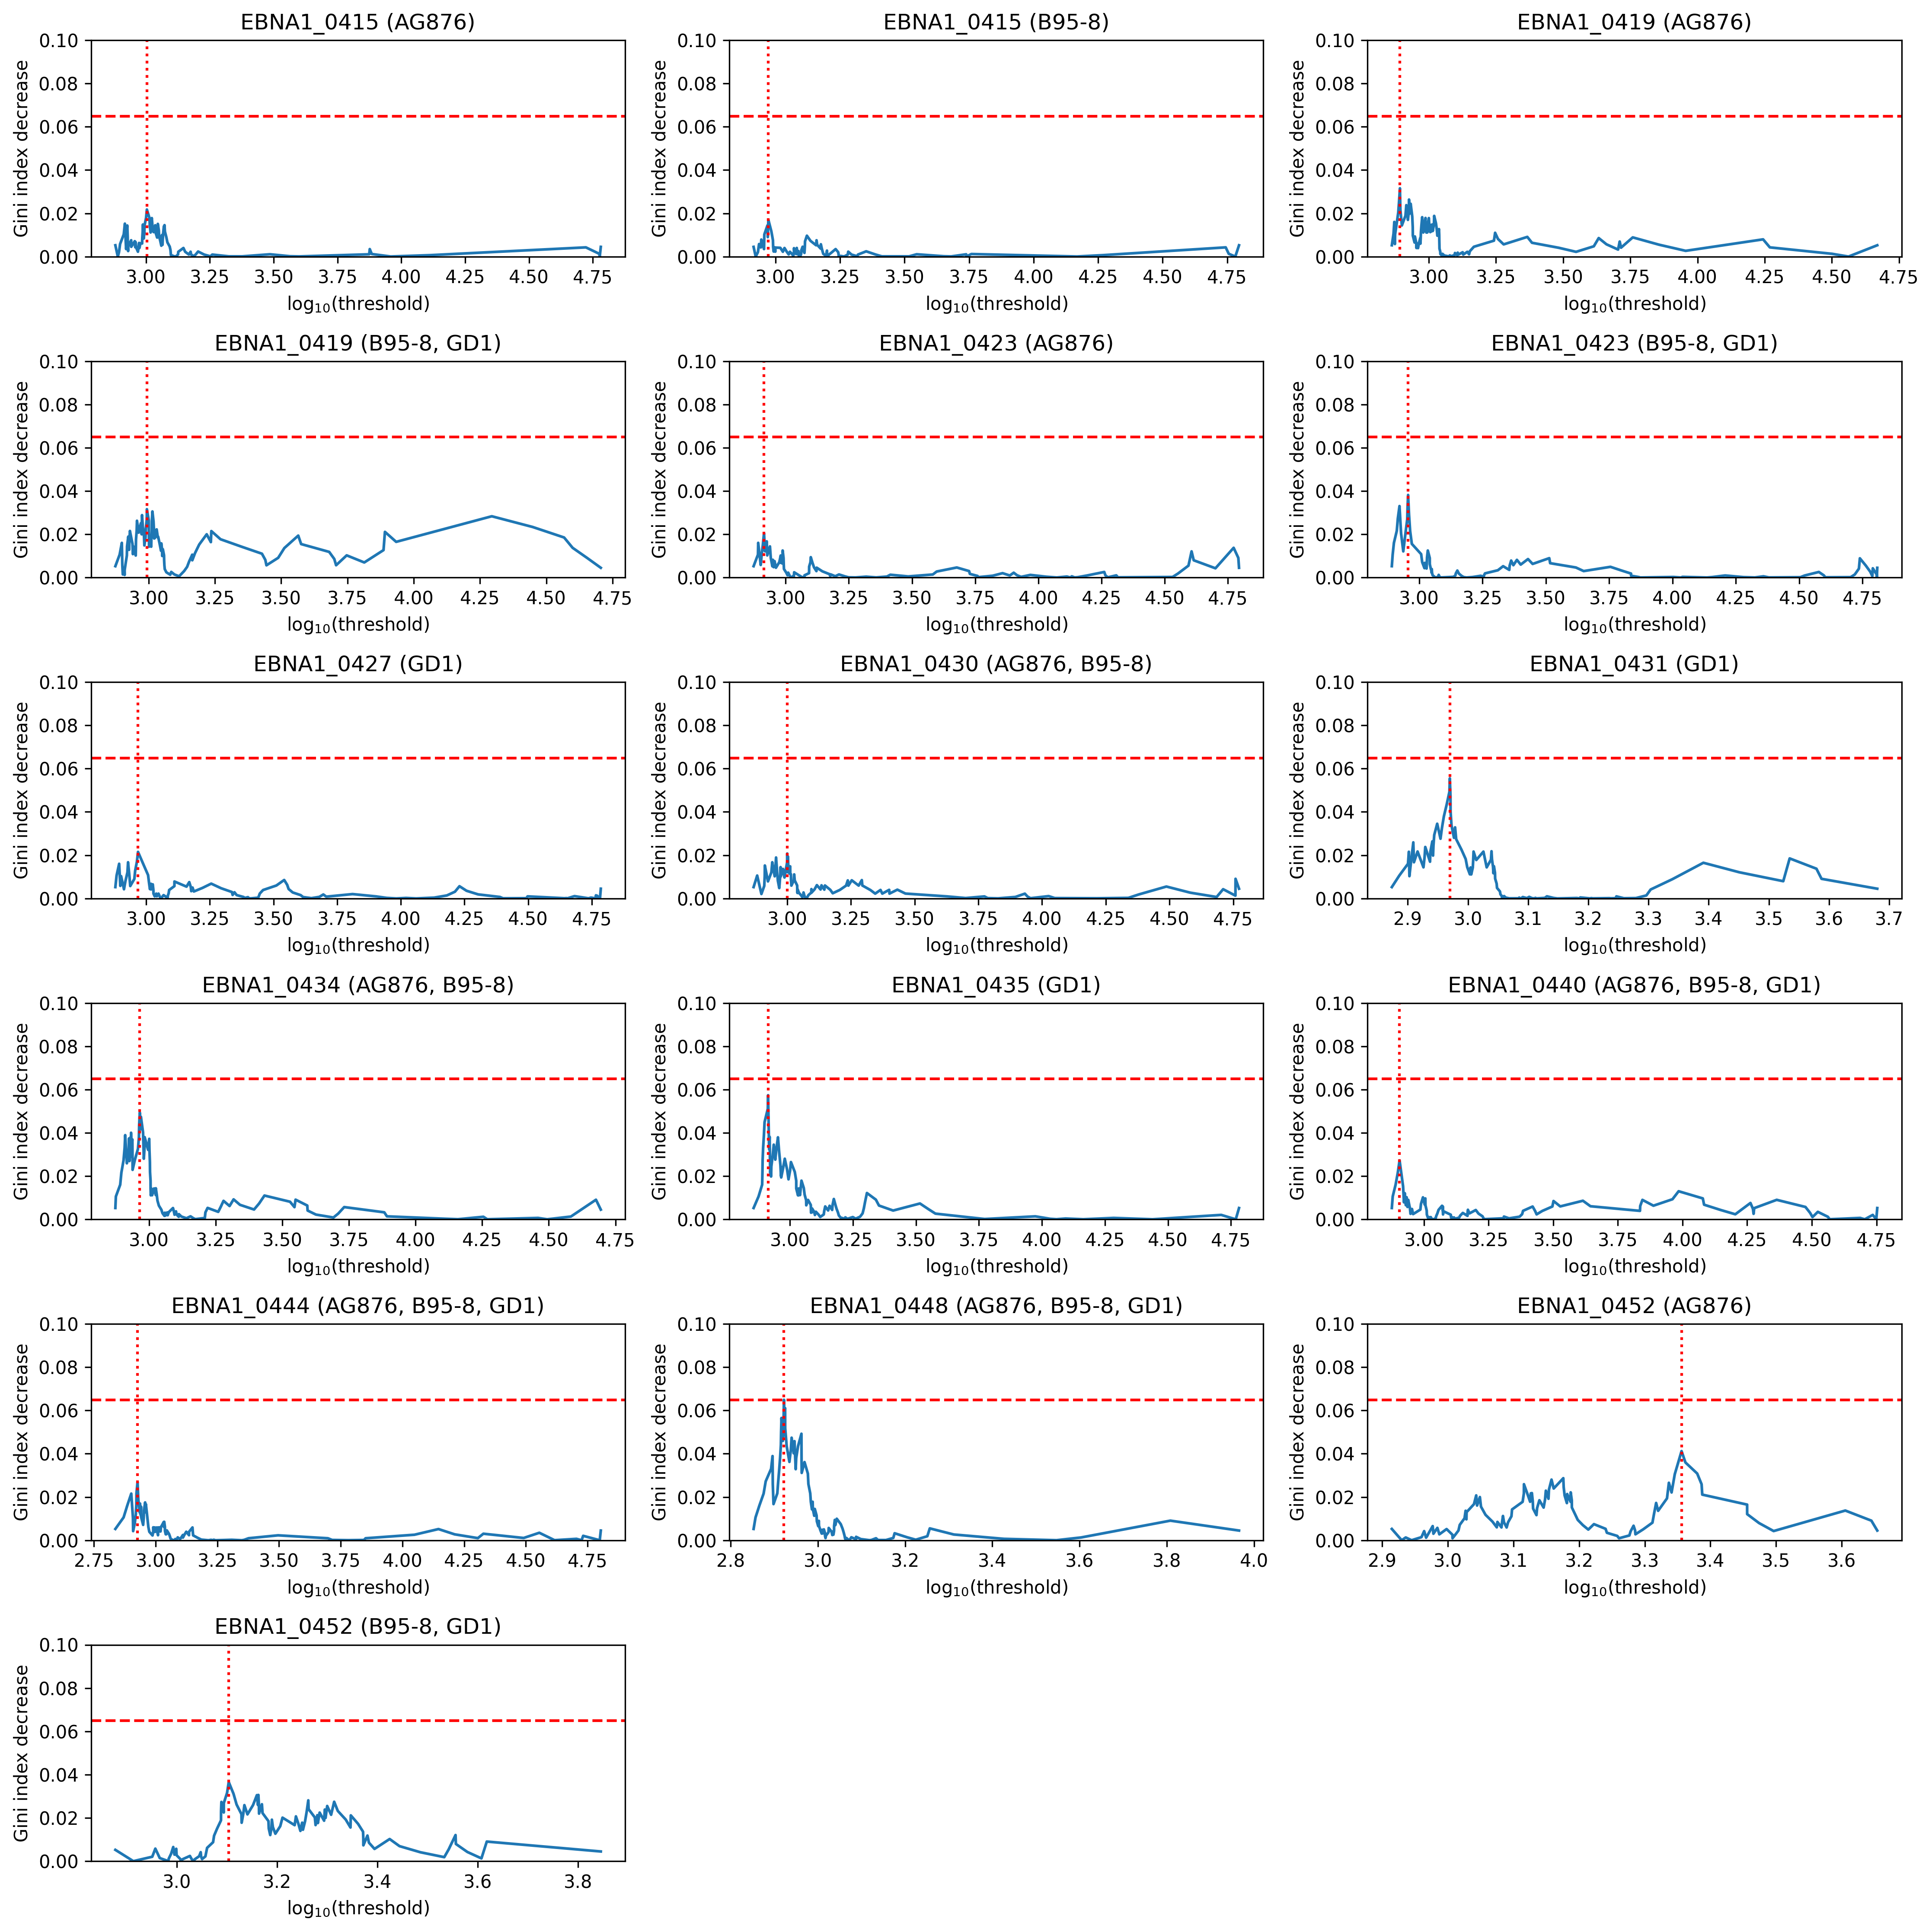

In [15]:
plot_signals_gini(smr, all_lower_bounds, gini)

**Summary of thresholds**

In [16]:
summarize_thresholds(smr)

Threshold  p-value  \
ID                             MAX AUC Method                                  
EBNA1_0415 (AG876)             0.574   Chi-square           1008.33   0.0542   
                                       ROC01                1113.00   0.1146   
                                       Youden               1008.33   0.0542   
                                       |Sen-Spe|            1112.67   0.1695   
                                       Gini                 1008.33   0.0542   
                                       AUC (single thr.)    1008.33   0.0542   
EBNA1_0415 (B95-8)             0.546   Chi-square            939.00   0.1113   
                                       ROC01                1324.00   0.2221   
                                       Youden               1324.00   0.2221   
                                       |Sen-Spe|            1284.67   0.5560   
                                       Gini                  939.00   0.1113   
                                       AUC (single thr.)    1324.00   0.2221   
EBNA1_0419 (AG876)             0.599   Chi-square            780.67   0.0268   
                                       ROC01                1047.00   0.0746   
                                       Youden               1047.00   0.0746   
                                       |Sen-Spe|            1034.67   0.1695   
                                       Gini                  780.67   0.0268   
                                       AUC (single thr.)    1047.00   0.0746   
EBNA1_0419 (B95-8, GD1)        0.630   Chi-square            985.00   0.0185   
                                       ROC01                1033.33   0.0202   
                                       Youden               1033.33   0.0202   
                                       |Sen-Spe|            1083.00   0.0773   
                                       Gini                  985.00   0.0185   
                                       AUC (single thr.)    1033.33   0.0202   
EBNA1_0423 (AG876)             0.520   Chi-square            821.00   0.0945   
                                       ROC01                4755.67   0.4399   
                                       Youden                973.00   0.1677   
                                       |Sen-Spe|            1323.67   0.5560   
                                       Gini                  821.00   0.0945   
                                       AUC (single thr.)    1257.33   0.2293   
EBNA1_0423 (B95-8, GD1)        0.547   Chi-square            905.00   0.0117   
                                       ROC01                2309.00   0.2815   
                                       Youden                905.00   0.0117   
                                       |Sen-Spe|            1539.00   1.0000   
                                       Gini                  905.00   0.0117   
                                       AUC (single thr.)     905.00   0.0117   
EBNA1_0427 (GD1)               0.516   Chi-square            928.67   0.0662   
                                       ROC01                3483.00   0.2590   
                                       Youden                928.67   0.0662   
                                       |Sen-Spe|            2171.00   0.5560   
                                       Gini                  928.67   0.0662   
                                       AUC (single thr.)     928.67   0.0662   
EBNA1_0430 (AG876, B95-8)      0.528   Chi-square           1000.00   0.0650   
                                       ROC01                1065.00   0.1879   
                                       Youden               1006.67   0.0740   
                                       |Sen-Spe|            1187.33   1.0000   
                                       Gini                 1000.00   0.0650   
                                       AUC (single thr.)    1006.67   0.0740   
EBNA1_0431 (GD1)               0.595   Chi-square         

In [17]:
summarize_thresholds2(smr)

Chi-squared             ROC01  \
ID                                                                   
EBNA1_0415 (AG876)              1008.33 (0.0542)   1113.0 (0.1146)   
EBNA1_0415 (B95-8)                939.0 (0.1113)   1324.0 (0.2221)   
EBNA1_0419 (AG876)               780.67 (0.0268)   1047.0 (0.0746)   
EBNA1_0419 (B95-8, GD1)           985.0 (0.0185)  1033.33 (0.0202)   
EBNA1_0423 (AG876)                821.0 (0.0945)  4755.67 (0.4399)   
EBNA1_0423 (B95-8, GD1)           905.0 (0.0117)   2309.0 (0.2815)   
EBNA1_0427 (GD1)                 928.67 (0.0662)    3483.0 (0.259)   
EBNA1_0430 (AG876, B95-8)         1000.0 (0.065)   1065.0 (0.1879)   
EBNA1_0431 (GD1)                  933.0 (0.0015)  1094.33 (0.0531)   
EBNA1_0434 (AG876, B95-8)        923.33 (0.0029)    1001.67 (0.01)   
EBNA1_0435 (GD1)                 819.67 (0.0018)   1112.0 (0.0832)   
EBNA1_0440 (AG876, B95-8, GD1)    805.0 (0.0545)  1479.33 (0.4451)   
EBNA1_0444 (AG876, B95-8, GD1)   844.33 (0.0404)  1083.33 (0.2564)   
EBNA1_0448 (AG876, B95-8, GD1)    836.5 (0.0006)   917.33 (0.0028)   
EBNA1_0452 (AG876)               2270.0 (0.0087)  1438.67 (0.0265)   
EBNA1_0452 (B95-8, GD1)         1269.67 (0.0106)   1455.0 (0.0199)   

                               Youden's J statistic         |Sen-Spe|  \
ID                                                                      
EBNA1_0415 (AG876)                 1008.33 (0.0542)  1112.67 (0.1695)   
EBNA1_0415 (B95-8)                  1324.0 (0.2221)   1284.67 (0.556)   
EBNA1_0419 (AG876)                  1047.0 (0.0746)  1034.67 (0.1695)   
EBNA1_0419 (B95-8, GD1)            1033.33 (0.0202)   1083.0 (0.0773)   
EBNA1_0423 (AG876)                   973.0 (0.1677)   1323.67 (0.556)   
EBNA1_0423 (B95-8, GD1)              905.0 (0.0117)      1539.0 (1.0)   
EBNA1_0427 (GD1)                    928.67 (0.0662)    2171.0 (0.556)   
EBNA1_0430 (AG876, B95-8)           1006.67 (0.074)     1187.33 (1.0)   
EBNA1_0431 (GD1)                     933.0 (0.0015)   1109.0 (0.1695)   
EBNA1_0434 (AG876, B95-8)           932.33 (0.0035)    1146.0 (0.556)   
EBNA1_0435 (GD1)                     897.0 (0.0101)  1210.67 (0.3264)   
EBNA1_0440 (AG876, B95-8, GD1)      9660.0 (0.1601)   1413.67 (0.556)   
EBNA1_0444 (AG876, B95-8, GD1)      912.67 (0.1036)   1132.67 (0.556)   
EBNA1_0448 (AG876, B95-8, GD1)      917.33 (0.0028)  1006.33 (0.3264)   
EBNA1_0452 (AG876)                 1499.33 (0.0247)  1378.67 (0.0773)   
EBNA1_0452 (B95-8, GD1)            1269.67 (0.0106)   1524.0 (0.0773)   

                                            Gini AUC (single thr.)  
ID                                                                  
EBNA1_0415 (AG876)              1008.33 (0.0542)  1008.33 (0.0542)  
EBNA1_0415 (B95-8)                939.0 (0.1113)   1324.0 (0.2221)  
EBNA1_0419 (AG876)               780.67 (0.0268)   1047.0 (0.0746)  
EBNA1_0419 (B95-8, GD1)           985.0 (0.0185)  1033.33 (0.0202)  
EBNA1_0423 (AG876)                821.0 (0.0945)  1257.33 (0.2293)  
EBNA1_0423 (B95-8, GD1)           905.0 (0.0117)    905.0 (0.0117)  
EBNA1_0427 (GD1)                 928.67 (0.0662)   928.67 (0.0662)  
EBNA1_0430 (AG876, B95-8)         1000.0 (0.065)   1006.67 (0.074)  
EBNA1_0431 (GD1)                  933.0 (0.0015)    933.0 (0.0015)  
EBNA1_0434 (AG876, B95-8)        923.33 (0.0029)   932.33 (0.0035)  
EBNA1_0435 (GD1)                 819.67 (0.0018)    897.0 (0.0101)  
EBNA1_0440 (AG876, B95-8, GD1)    805.0 (0.0545)   9660.0 (0.1601)  
EBNA1_0444 (AG876, B95-8, GD1)   844.33 (0.0404)   912.67 (0.1036)  
EBNA1_0448 (AG876, B95-8, GD1)    836.5 (0.0006)   917.33 (0.0028)  
EBNA1_0452 (AG876)               2270.0 (0.0087)  1499.33 (0.0247)  
EBNA1_0452 (B95-8, GD1)         1269.67 (0.0106)  1269.67 (0.0106)

In [18]:
summarize_sen_spe(smr)

sensitivity                             \
                               Chi-squared ROC01 Youden's J statistic   
name                                                                    
EBNA1_0415 (AG876)                    0.48  0.60                 0.48   
EBNA1_0415 (B95-8)                    0.20  0.62                 0.62   
EBNA1_0419 (AG876)                    0.16  0.62                 0.62   
EBNA1_0419 (B95-8, GD1)               0.46  0.56                 0.56   
EBNA1_0423 (AG876)                    0.12  0.72                 0.30   
EBNA1_0423 (B95-8, GD1)               0.22  0.66                 0.22   
EBNA1_0427 (GD1)                      0.22  0.70                 0.22   
EBNA1_0430 (AG876, B95-8)             0.32  0.44                 0.36   
EBNA1_0431 (GD1)                      0.40  0.56                 0.40   
EBNA1_0434 (AG876, B95-8)             0.38  0.46                 0.40   
EBNA1_0435 (GD1)                      0.20  0.54                 0.34   
EBNA1_0440 (AG876, B95-8, GD1)        0.90  0.52                 0.28   
EBNA1_0444 (AG876, B95-8, GD1)        0.18  0.50                 0.30   
EBNA1_0448 (AG876, B95-8, GD1)        0.34  0.48                 0.48   
EBNA1_0452 (AG876)                    0.98  0.68                 0.70   
EBNA1_0452 (B95-8, GD1)               0.48  0.58                 0.48   

                                                                 specifiticy  \
                               |Sen-Spe|  Gini AUC (single thr.) Chi-squared   
name                                                                           
EBNA1_0415 (AG876)                  0.58  0.48              0.48        0.72   
EBNA1_0415 (B95-8)                  0.54  0.20              0.62        0.93   
EBNA1_0419 (AG876)                  0.58  0.16              0.62        0.98   
EBNA1_0419 (B95-8, GD1)             0.60  0.46              0.56        0.78   
EBNA1_0423 (AG876)                  0.46  0.12              0.40        0.98   
EBNA1_0423 (B95-8, GD1)             0.50  0.22              0.22        0.96   
EBNA1_0427 (GD1)                    0.46  0.22              0.22        0.93   
EBNA1_0430 (AG876, B95-8)           0.50  0.32              0.36        0.85   
EBNA1_0431 (GD1)                    0.58  0.40              0.40        0.89   
EBNA1_0434 (AG876, B95-8)           0.54  0.38              0.40        0.89   
EBNA1_0435 (GD1)                    0.56  0.20              0.34        1.00   
EBNA1_0440 (AG876, B95-8, GD1)      0.54  0.90              0.28        0.00   
EBNA1_0444 (AG876, B95-8, GD1)      0.54  0.18              0.30        0.96   
EBNA1_0448 (AG876, B95-8, GD1)      0.56  0.34              0.48        0.94   
EBNA1_0452 (AG876)                  0.60  0.98              0.70        0.20   
EBNA1_0452 (B95-8, GD1)             0.60  0.48              0.48        0.78   

                                                                           \
                               ROC01 Youden's J statistic |Sen-Spe|  Gini   
name                                                                        
EBNA1_0415 (AG876)              0.57                 0.72      0.57  0.72   
EBNA1_0415 (B95-8)              0.52                 0.52      0.54  0.93   
EBNA1_0419 (AG876)              0.57                 0.57      0.57  0.98   
EBNA1_0419 (B95-8, GD1)         0.69                 0.69      0.59  0.78   
EBNA1_0423 (AG876)              0.37                 0.83      0.46  0.98   
EBNA1_0423 (B95-8, GD1)         0.46                 0.96      0.50  0.96   
EBNA1_0427 (GD1)                0.43                 0.93      0.46  0.93   
EBNA1_0430 (AG876, B95-8)       0.70                 0.81      0.50  0.85   
EBNA1_0431 (GD1)                0.65                 0.89      0.57  0.89   
EBNA1_0434 (AG876, B95-8)       0.80                 0.87      0.54  0.89   
EBNA1_0435 (GD1)                0.65                 0.89      0.56  1.00   
EBNA1_0440 (AG876, B95-8, GD1)  0.57        

# Confidence intervals

In [19]:
smr_copy = smr[['name', 'proportion_min_g1', 'test_g1_prop_above', 'proportion_max_g1', 'proportion_min_g2', 'test_g2_prop_above', 'proportion_max_g2']]
smr_copy.columns = ['ID', 'healthy (min)', 'healthy (mean)', 'healthy (max)', 'CFS - infected (min)', 'CFS - infected (mean)', 'CFS - infected (max)']
smr_copy.iloc[:, 1:] = np.round(smr_copy.iloc[:, 1:], 2)
smr_copy

ID  healthy (min)  healthy (mean)  \
0               EBNA1_0415 (AG876)           0.38            0.52   
1               EBNA1_0415 (B95-8)           0.69            0.80   
2               EBNA1_0419 (AG876)           0.74            0.84   
3          EBNA1_0419 (B95-8, GD1)           0.40            0.54   
4               EBNA1_0423 (AG876)           0.79            0.88   
5          EBNA1_0423 (B95-8, GD1)           0.67            0.78   
6                 EBNA1_0427 (GD1)           0.67            0.78   
7        EBNA1_0430 (AG876, B95-8)           0.55            0.68   
8                 EBNA1_0431 (GD1)           0.46            0.60   
9        EBNA1_0434 (AG876, B95-8)           0.49            0.62   
10                EBNA1_0435 (GD1)           0.69            0.80   
11  EBNA1_0440 (AG876, B95-8, GD1)           0.82            0.90   
12  EBNA1_0444 (AG876, B95-8, GD1)           0.71            0.82   
13  EBNA1_0448 (AG876, B95-8, GD1)           0.53            0.66   
14              EBNA1_0452 (AG876)           0.00            0.02   
15         EBNA1_0452 (B95-8, GD1)           0.38            0.52   

    healthy (max)  CFS - infected (min)  CFS - infected (mean)  \
0            0.66                  0.60                   0.72   
1            0.91                  0.86                   0.93   
2            0.94                  0.95                   0.98   
3            0.68                  0.67                   0.78   
4            0.97                  0.95                   0.98   
5            0.89                  0.91                   0.96   
6            0.89                  0.86                   0.93   
7            0.81                  0.76                   0.85   
8            0.74                  0.81                   0.89   
9            0.75                  0.81                   0.89   
10           0.91                  1.00                   1.00   
11           0.98                  1.00                   1.00   
12           0.93                  0.91                   0.96   
13           0.79                  0.88                   0.94   
14           0.06                  0.10                   0.20   
15           0.66                  0.67                   0.78   

    CFS - infected (max)  
0                   0.84  
1                   1.00  
2                   1.00  
3                   0.89  
4                   1.00  
5                   1.00  
6                   1.00  
7                   0.95  
8                   0.97  
9                   0.97  
10                  1.00  
11                  1.00  
12                  1.00  
13                  1.00  
14                  0.31  
15                  0.89

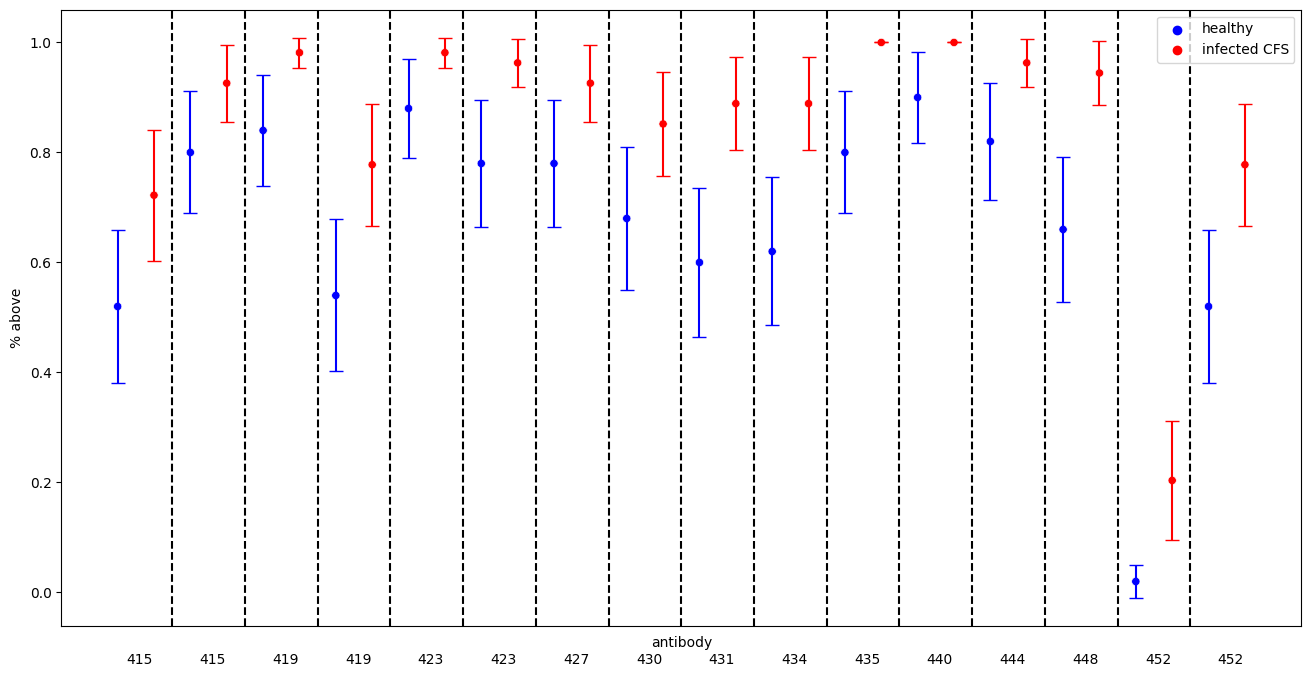

In [20]:
plot_conf_int(smr, 'healthy', 'infected CFS')

# Multiple testing correction

In [21]:
ag876 = 'FEYHQEGGPDGEPDMPPGAIEQGPADDPGEGPSTGPRGQGDGGRRKKGGWYG'
ag876_stop = [15, 19, 23, 30, 34, 40, 44, 48, 52]
ag876_target = 16
b958 = 'FEYHQEGGPDGEPDVPPGAIEQGPADDPGEGPSTGPRGQGDGGRRKKGGWFG'
b958_stop = [15, 19, 23, 30, 34, 40, 44, 48, 52]
b958_target = 16
gd1 = 'QEGGPDGEPDVPPGAIEQGPTDDPGEGPSTGPRGQGDGGRRKKGGWFG'
gd1_stop = [15, 19, 23, 27, 31, 36, 40, 44, 48]
gd1_target = 12

In [22]:
adj_p_values_bonf = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'bonferroni')[1])
adj_p_values_bh = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_bh')[1])
adj_p_values_by = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_by')[1])
adj_p_values_bky = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_tsbky')[1])

In [23]:
adj_p_values = [adj_p_values_bonf, adj_p_values_bh, adj_p_values_by, adj_p_values_bky]
correction_types = ['Bonferroni' ,'Benjamini-Hochberg', 'Benjamini-Yekutieli', '2-stage Benjamini-Krieger-Yekutieli']
strains = ['AG876', 'B95-8', 'GD1']
strain_seqs = [ag876, b958, gd1]
strain_stops = [ag876_stop, b958_stop, gd1_stop]
strain_targets = [ag876_target, b958_target, gd1_target]

In [24]:
pvals = np.round(pd.DataFrame({k:v for k,v in zip(correction_types, adj_p_values)}), 3)
pvals.insert(0, 'ID', smr.name)
pvals

ID  Bonferroni  Benjamini-Hochberg  \
0               EBNA1_0415 (AG876)       0.062               1.139   
1               EBNA1_0415 (B95-8)      -0.000               0.953   
2               EBNA1_0419 (AG876)       0.368               1.323   
3          EBNA1_0419 (B95-8, GD1)       0.530               1.433   
4               EBNA1_0423 (AG876)      -0.000               0.996   
5          EBNA1_0423 (B95-8, GD1)       0.729               1.574   
6                 EBNA1_0427 (GD1)      -0.000               1.121   
7        EBNA1_0430 (AG876, B95-8)      -0.000               1.121   
8                 EBNA1_0431 (GD1)       1.617               2.021   
9        EBNA1_0434 (AG876, B95-8)       1.331               1.933   
10                EBNA1_0435 (GD1)       1.544               2.021   
11  EBNA1_0440 (AG876, B95-8, GD1)       0.060               1.139   
12  EBNA1_0444 (AG876, B95-8, GD1)       0.189               1.189   
13  EBNA1_0448 (AG876, B95-8, GD1)       2.013               2.021   
14              EBNA1_0452 (AG876)       0.855               1.574   
15         EBNA1_0452 (B95-8, GD1)       0.769               1.574   

    Benjamini-Yekutieli  2-stage Benjamini-Krieger-Yekutieli  
0                 0.610                                1.477  
1                 0.424                                1.291  
2                 0.794                                1.660  
3                 0.904                                1.771  
4                 0.467                                1.334  
5                 1.045                                1.912  
6                 0.592                                1.459  
7                 0.592                                1.459  
8                 1.492                                2.359  
9                 1.404                                2.271  
10                1.492                                2.359  
11                0.610                                1.477  
12                0.660                                1.527  
13                1.492                                2.359  
14                1.045                                1.912  
15                1.045                                1.912

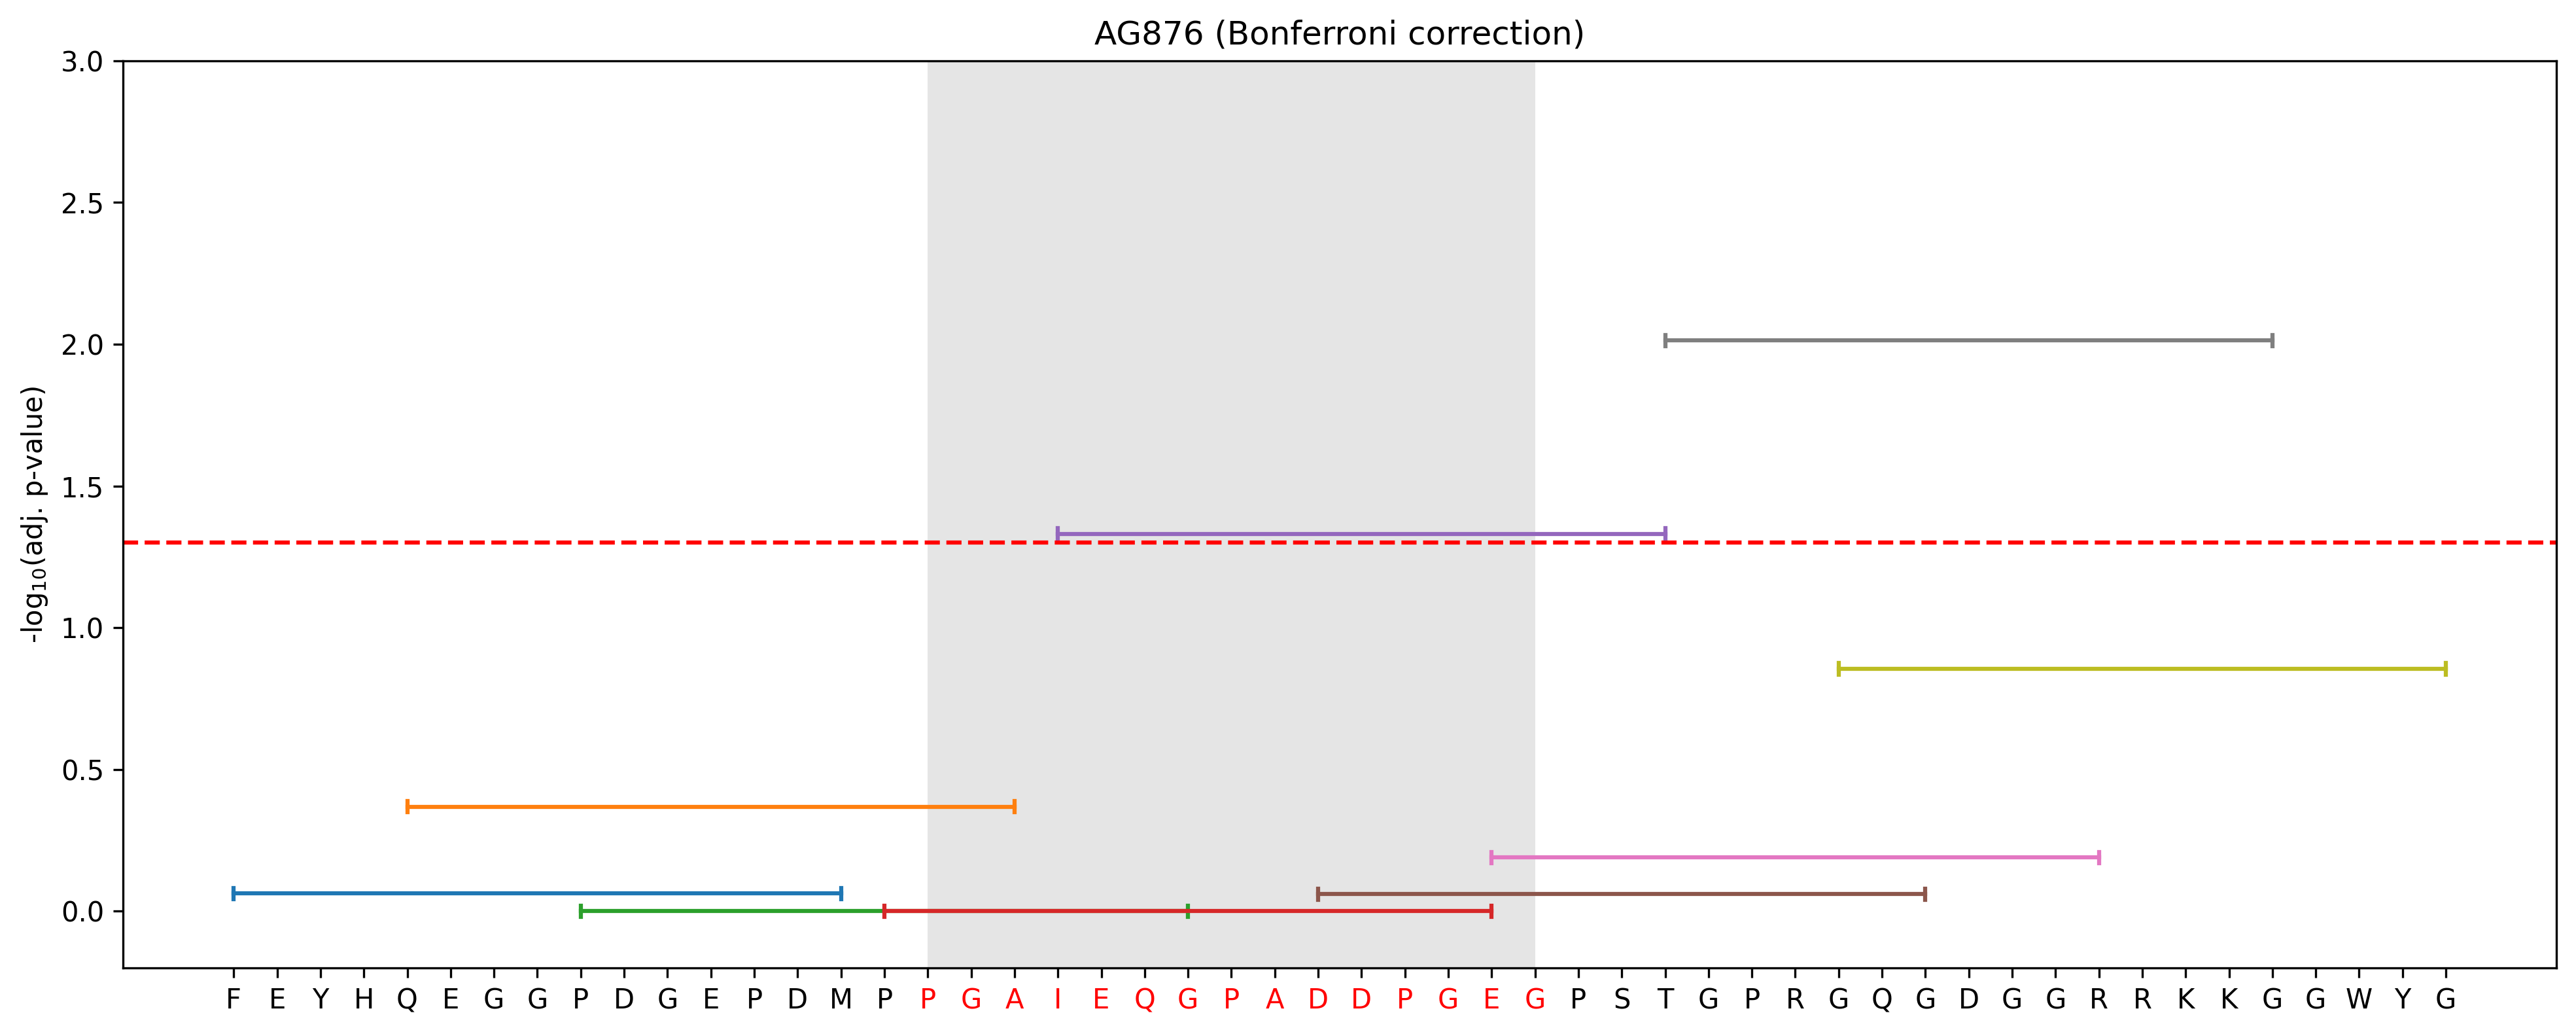

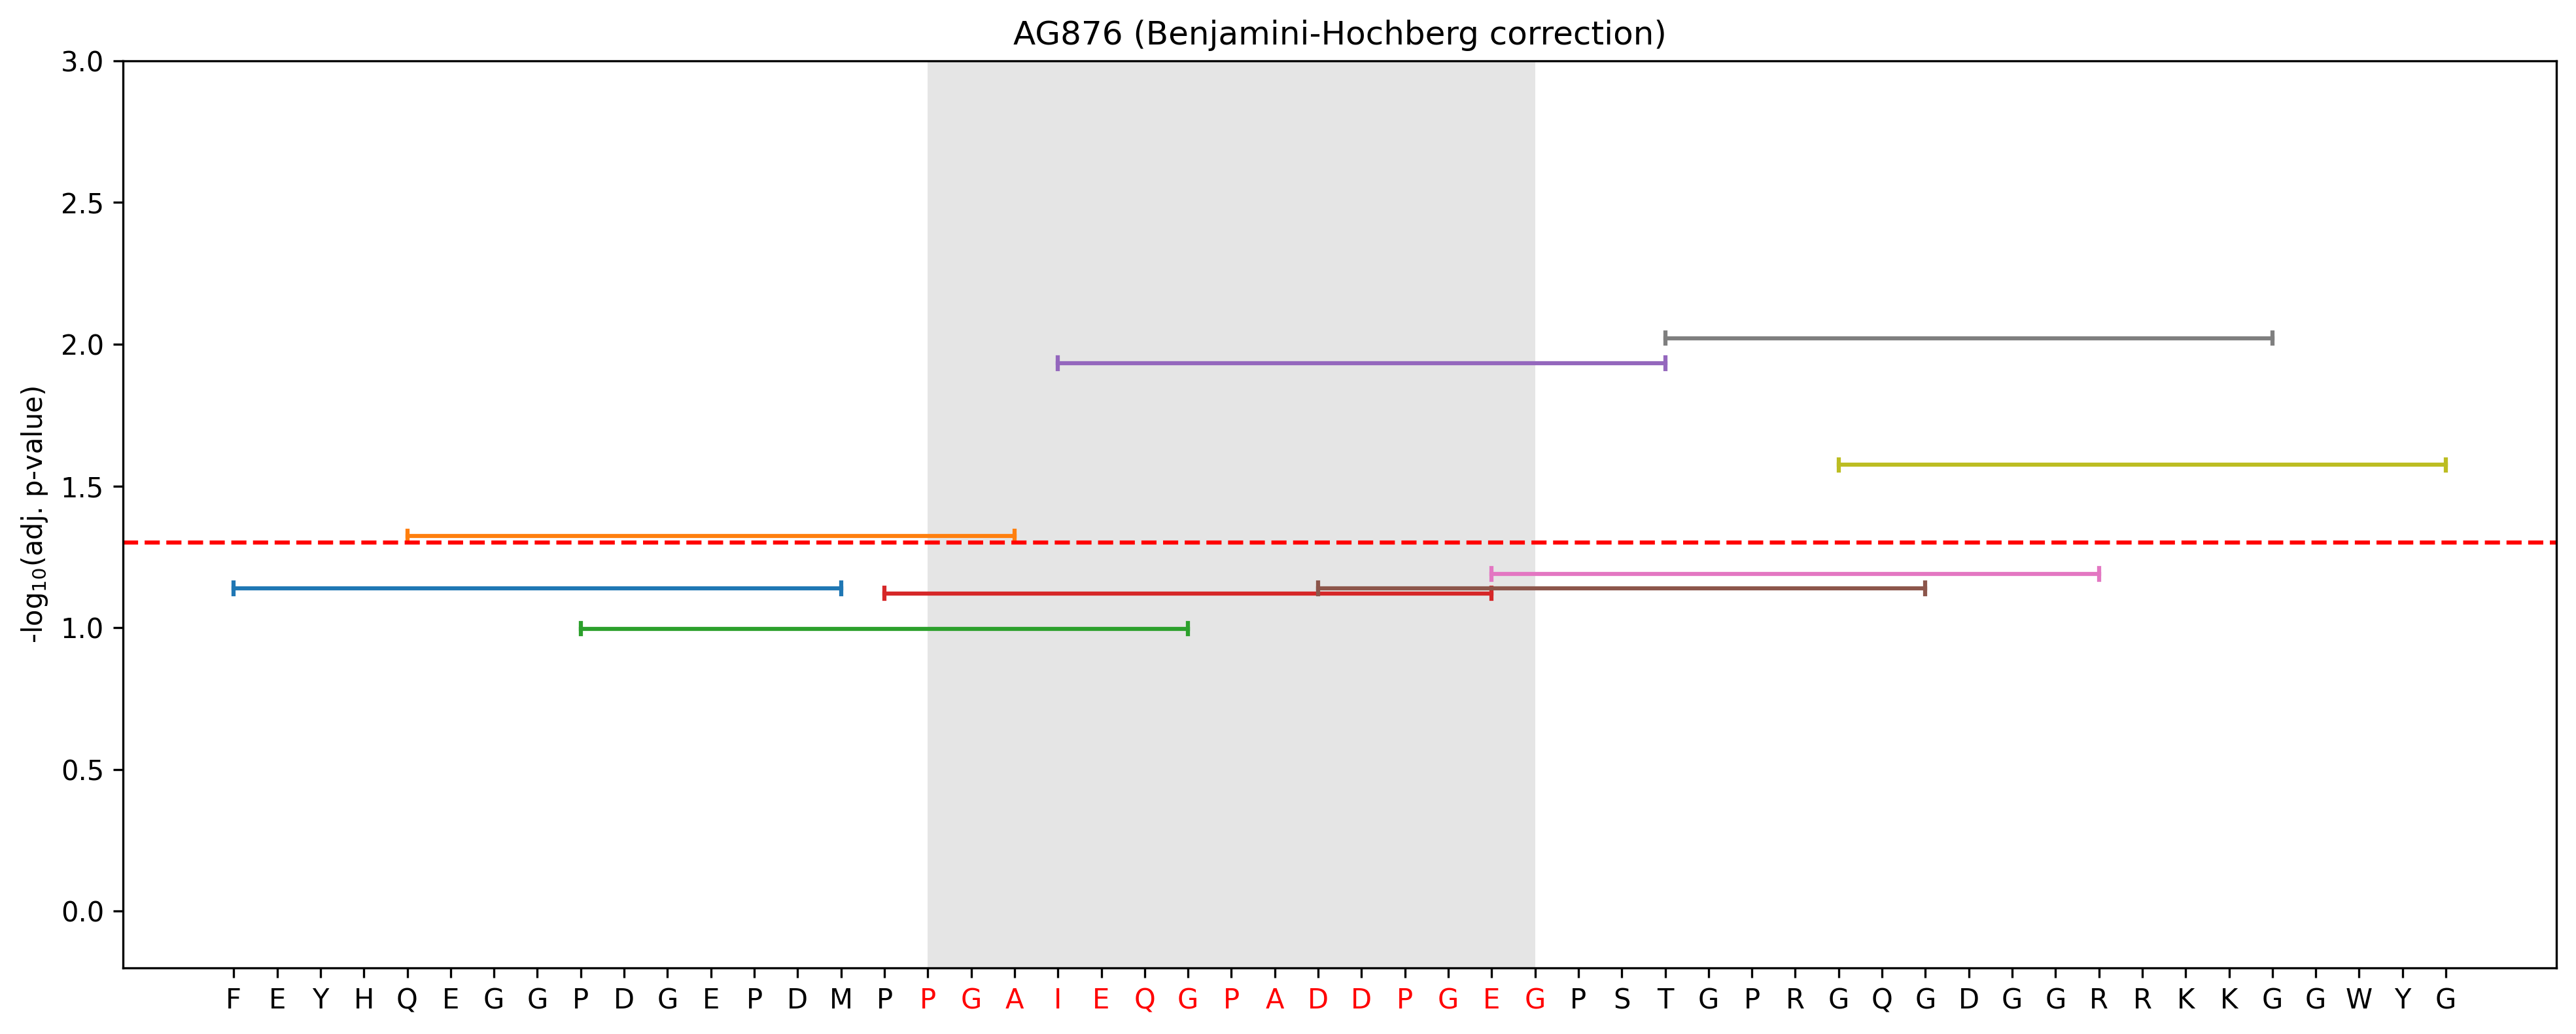

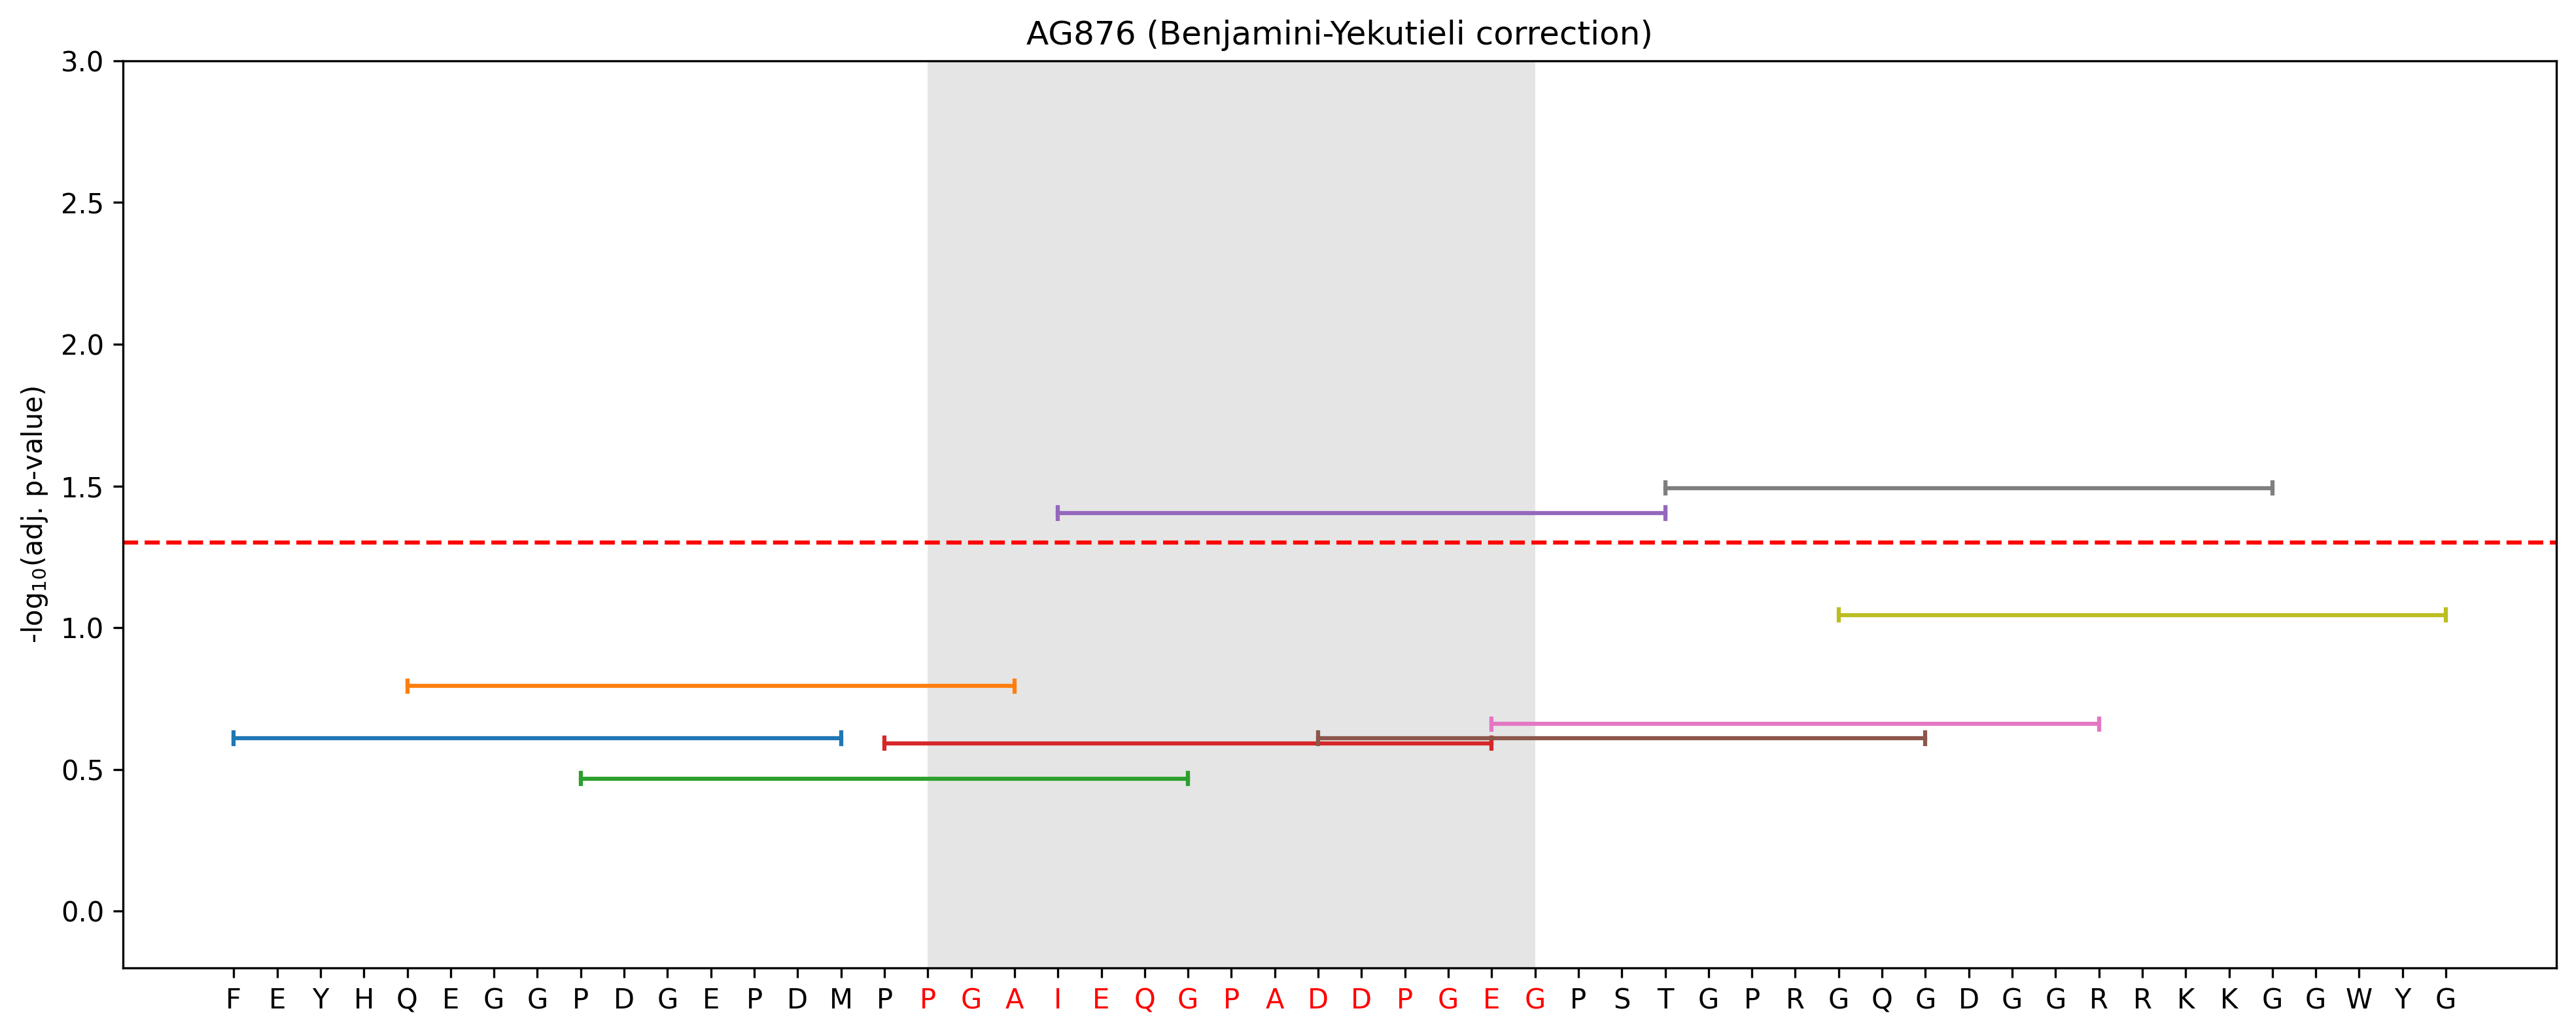

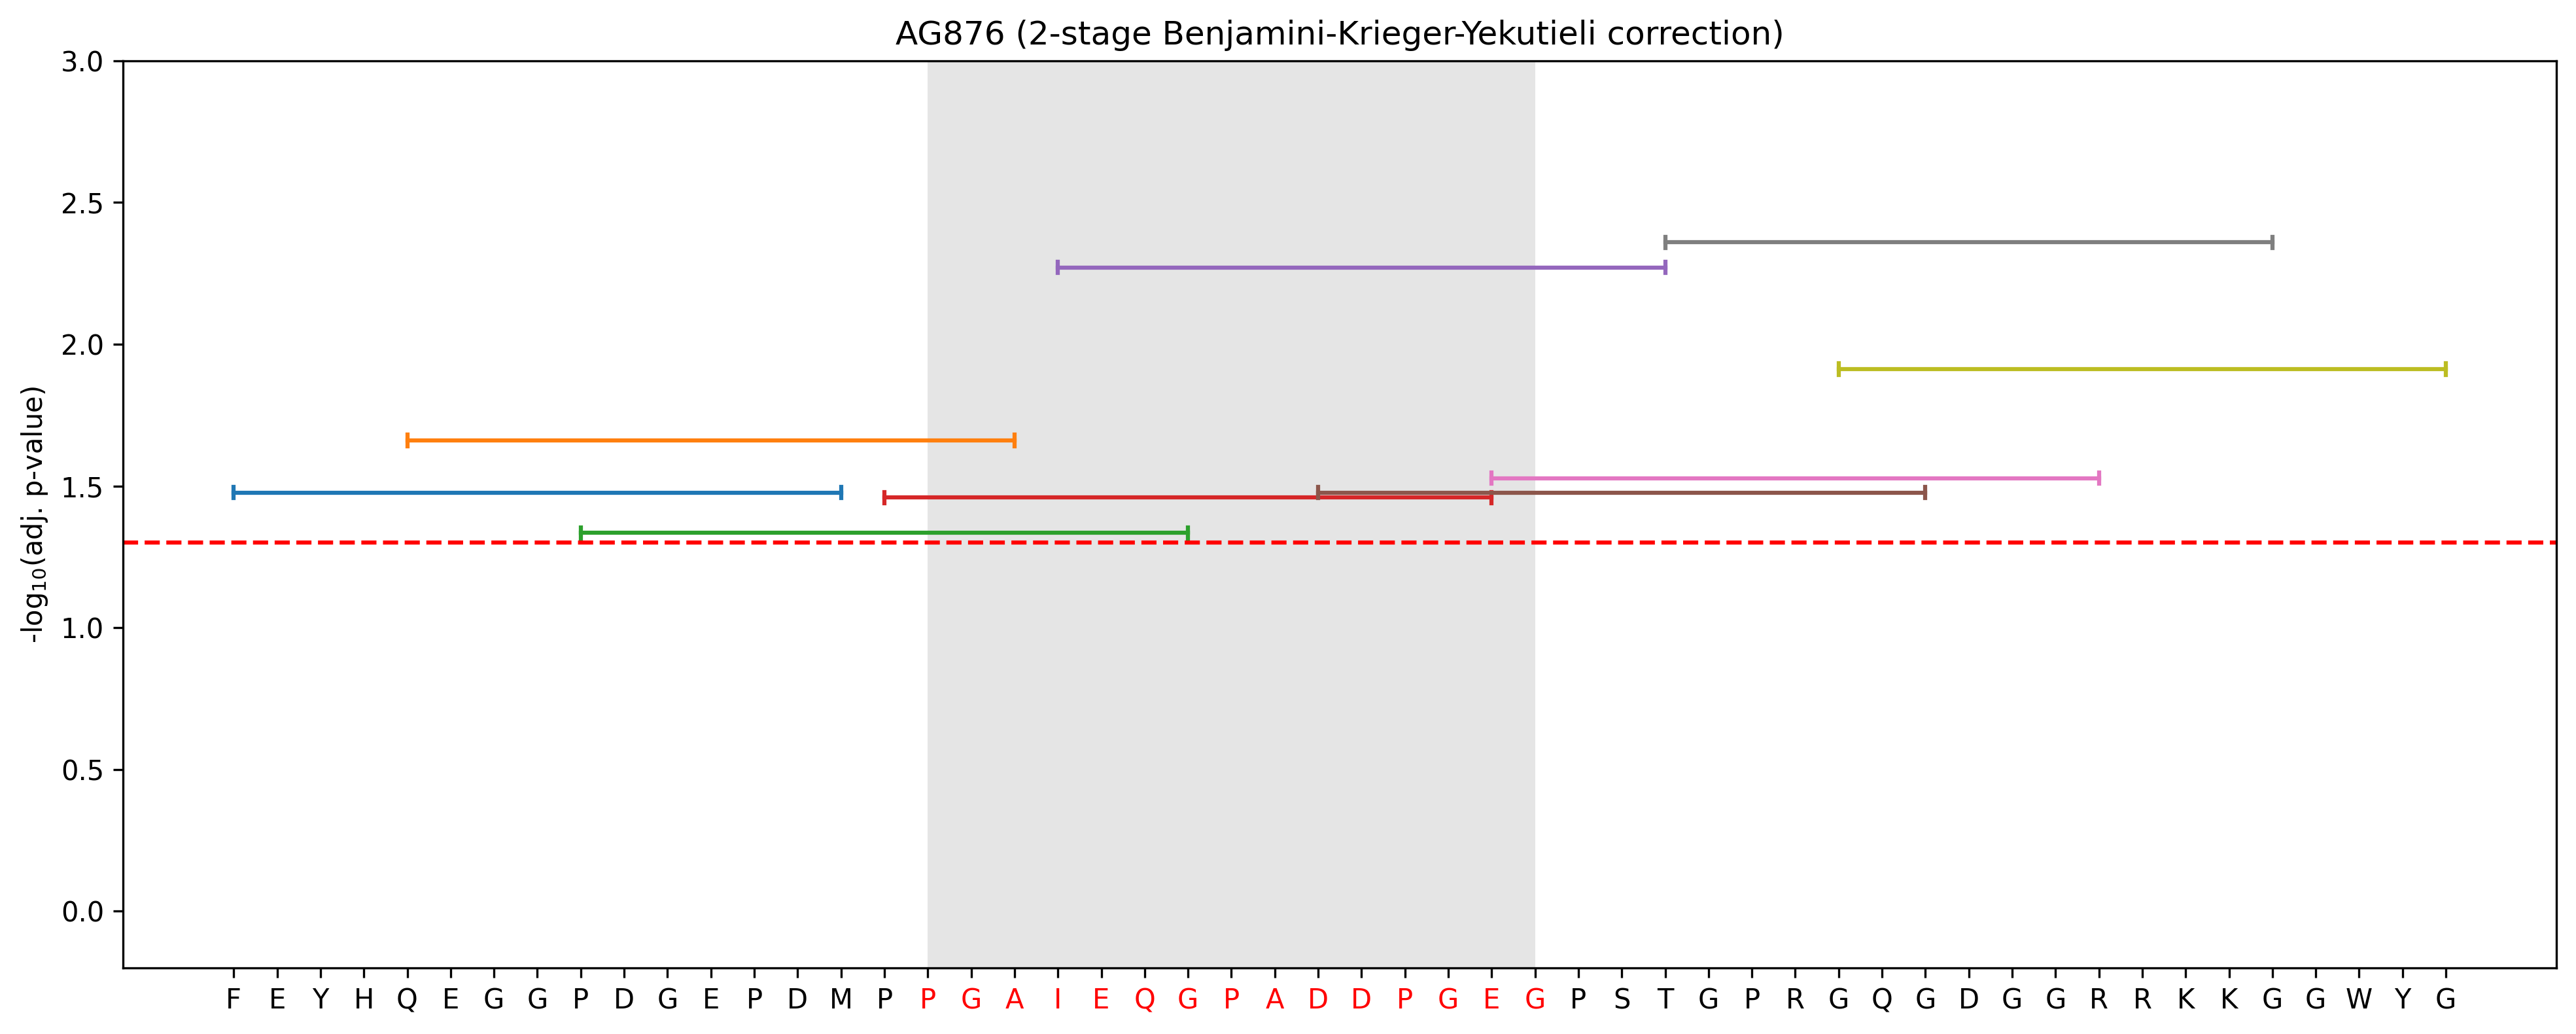

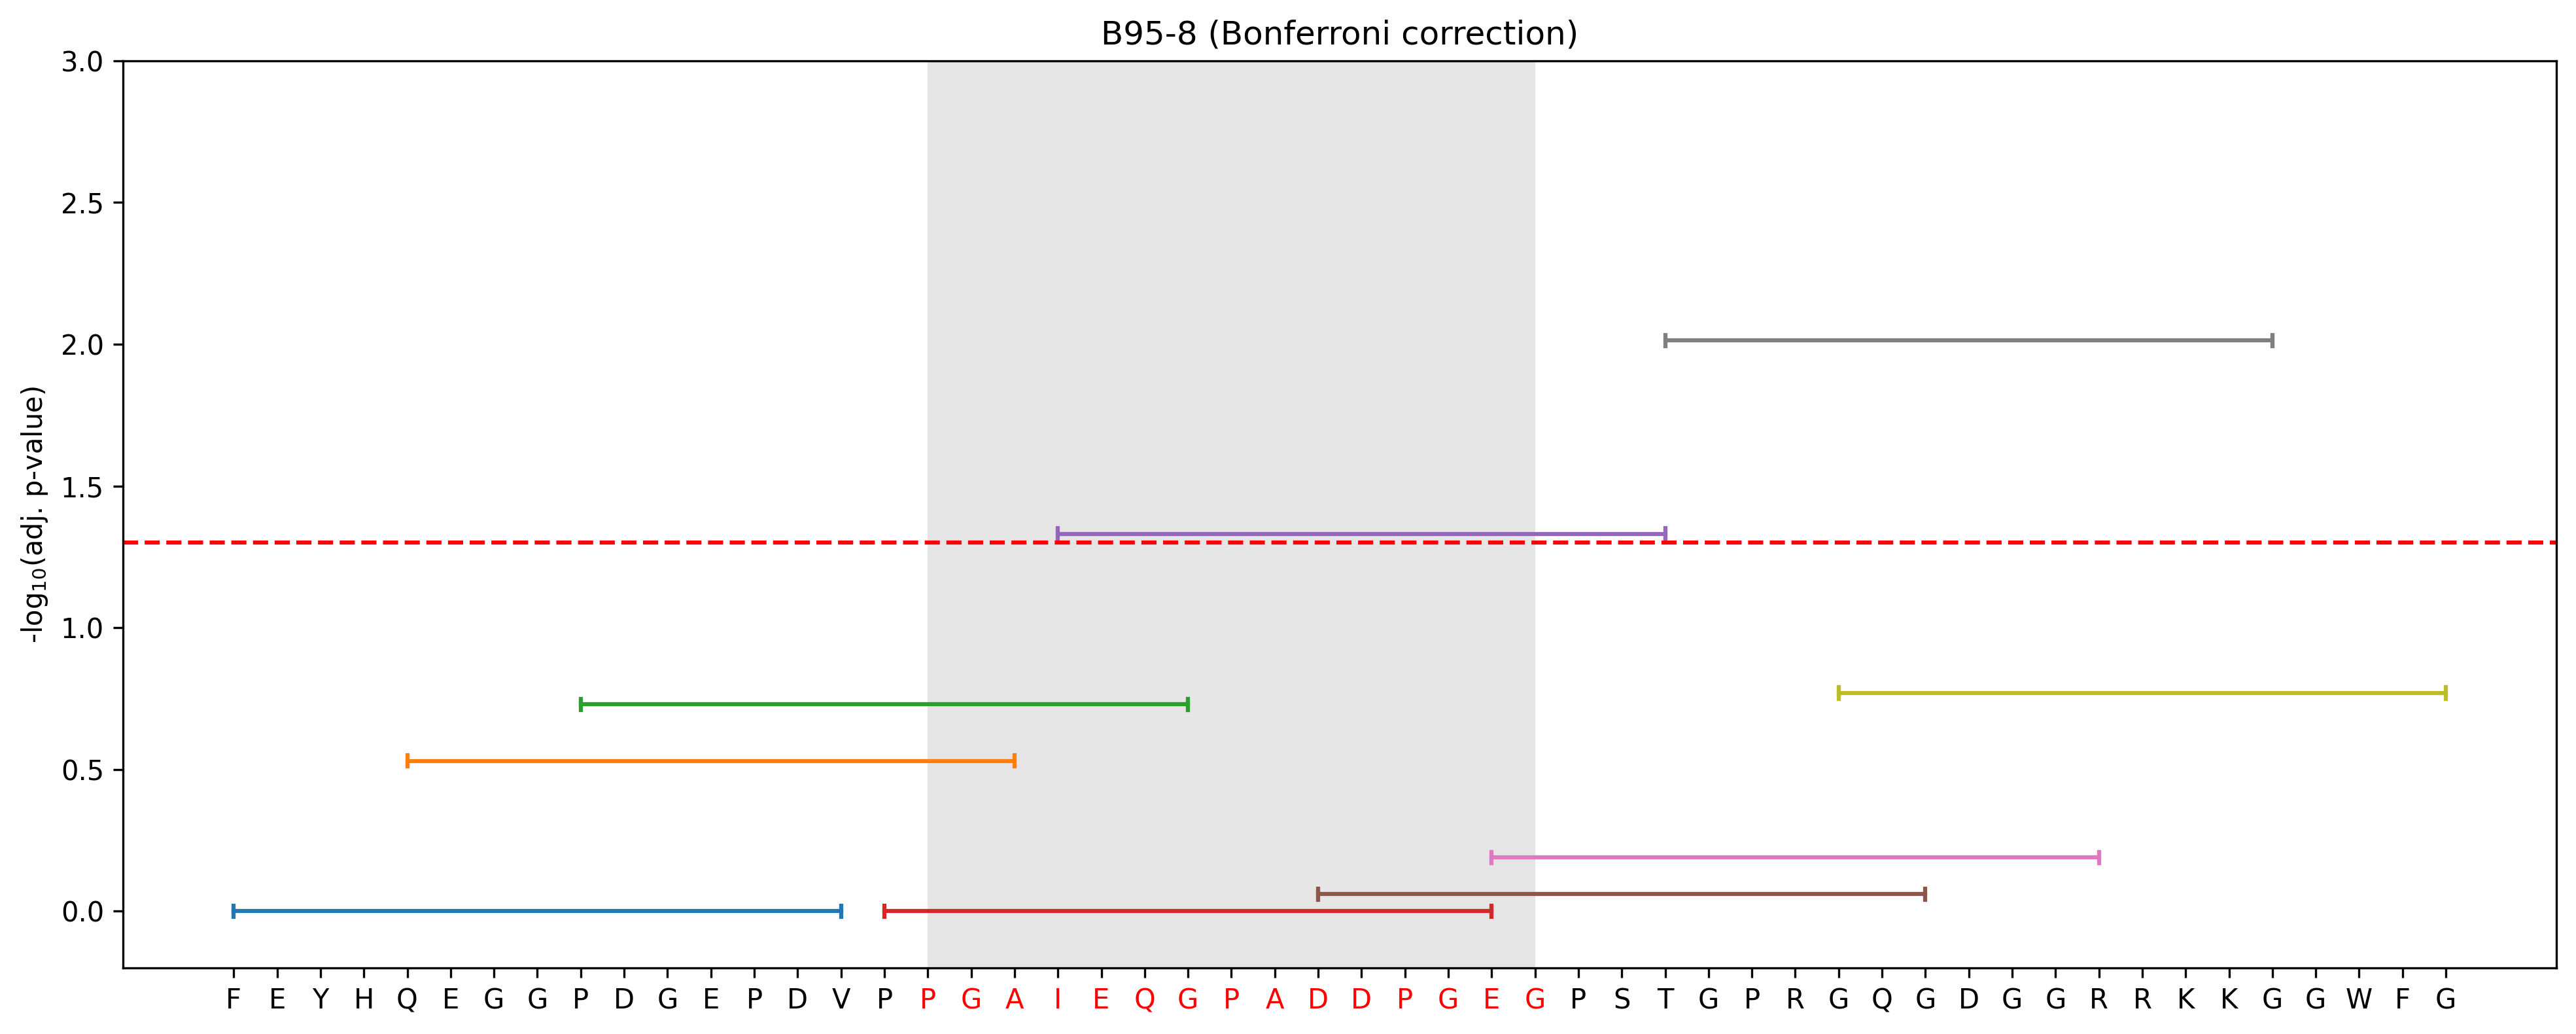

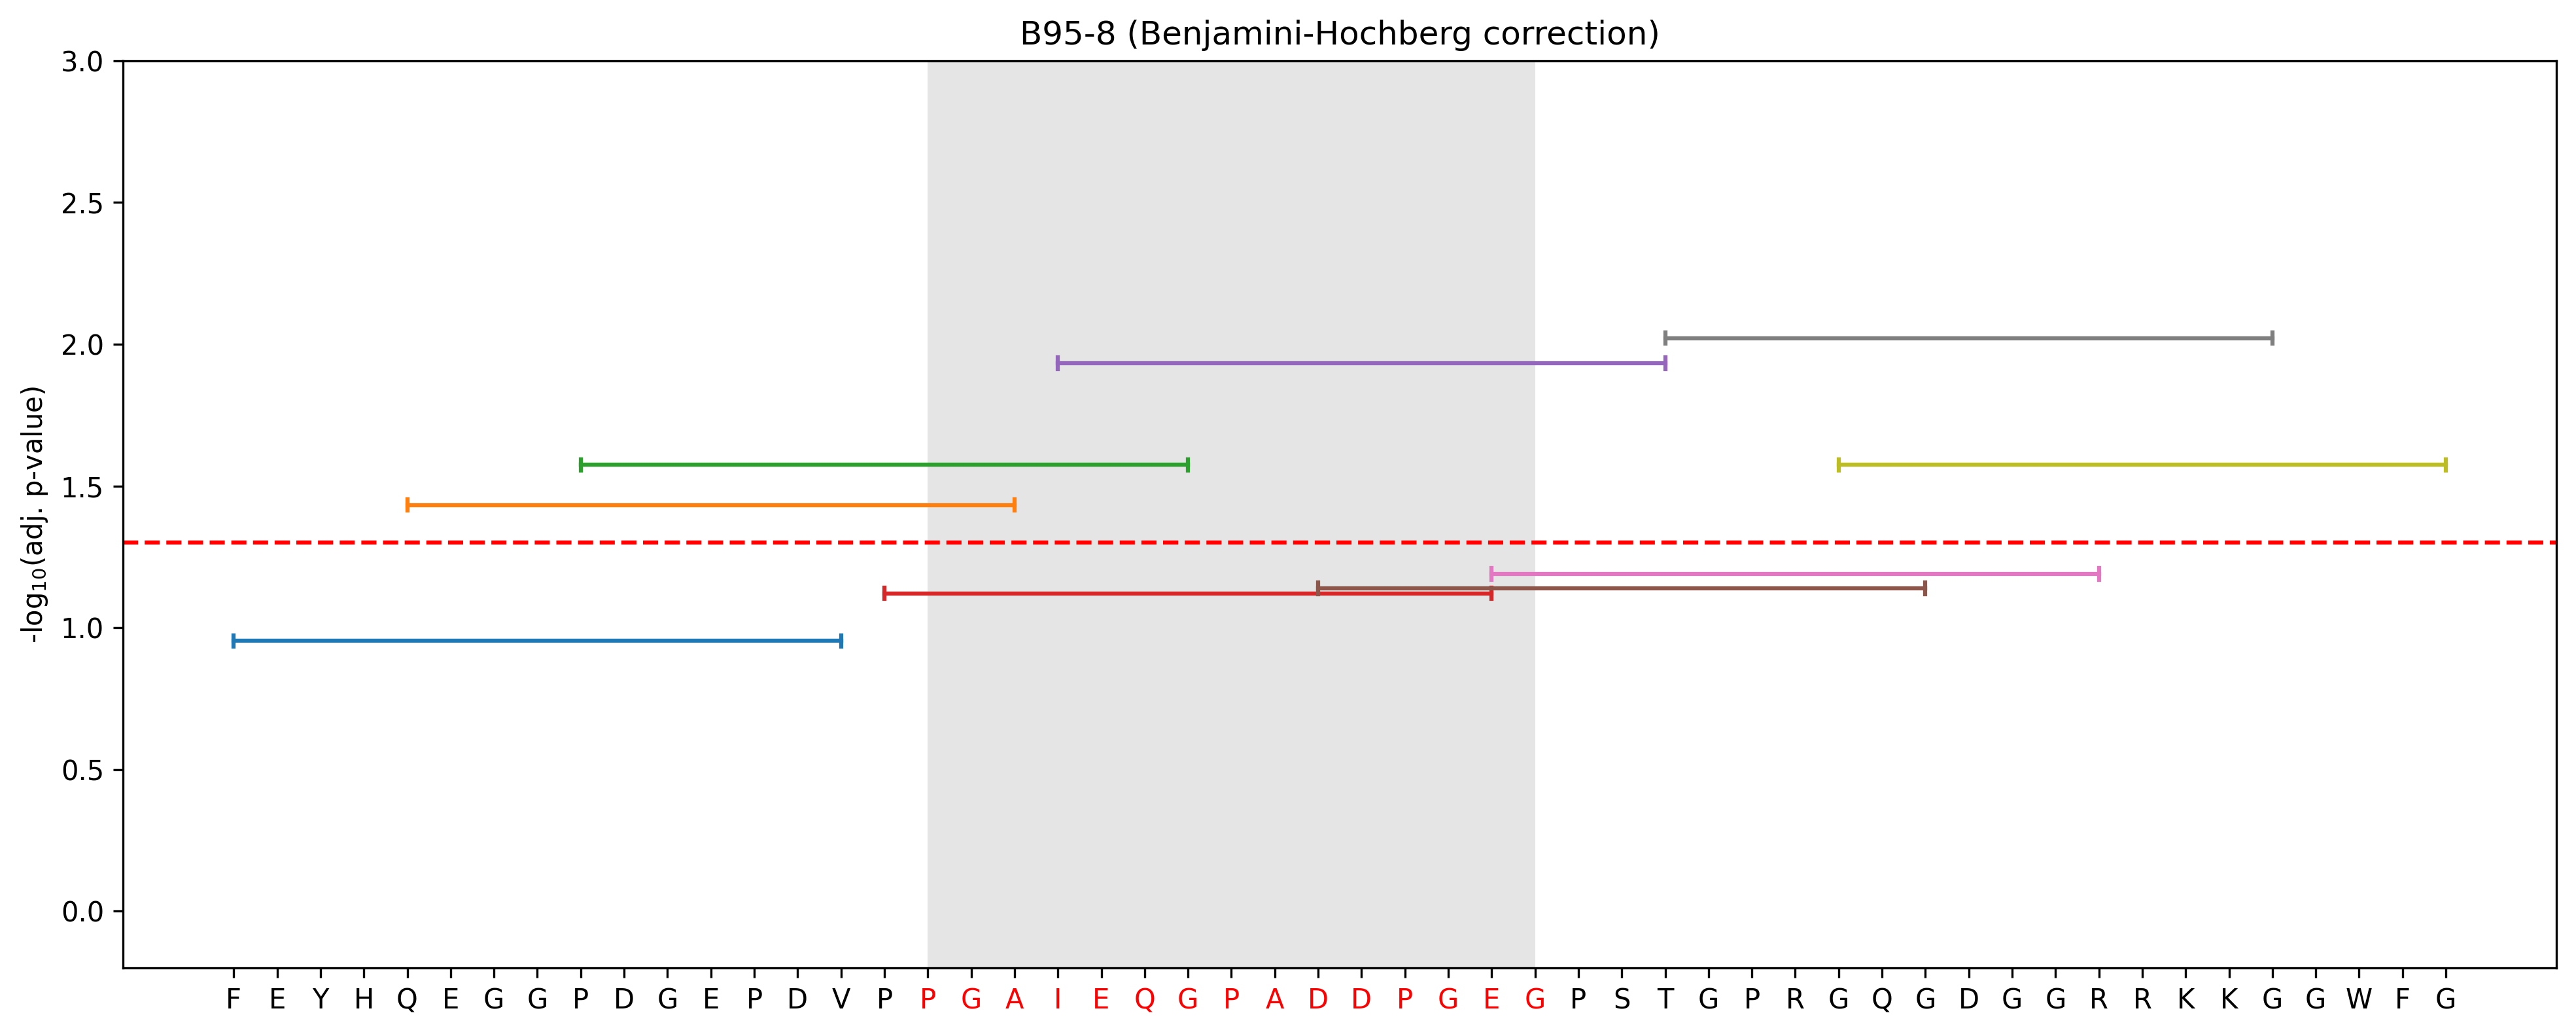

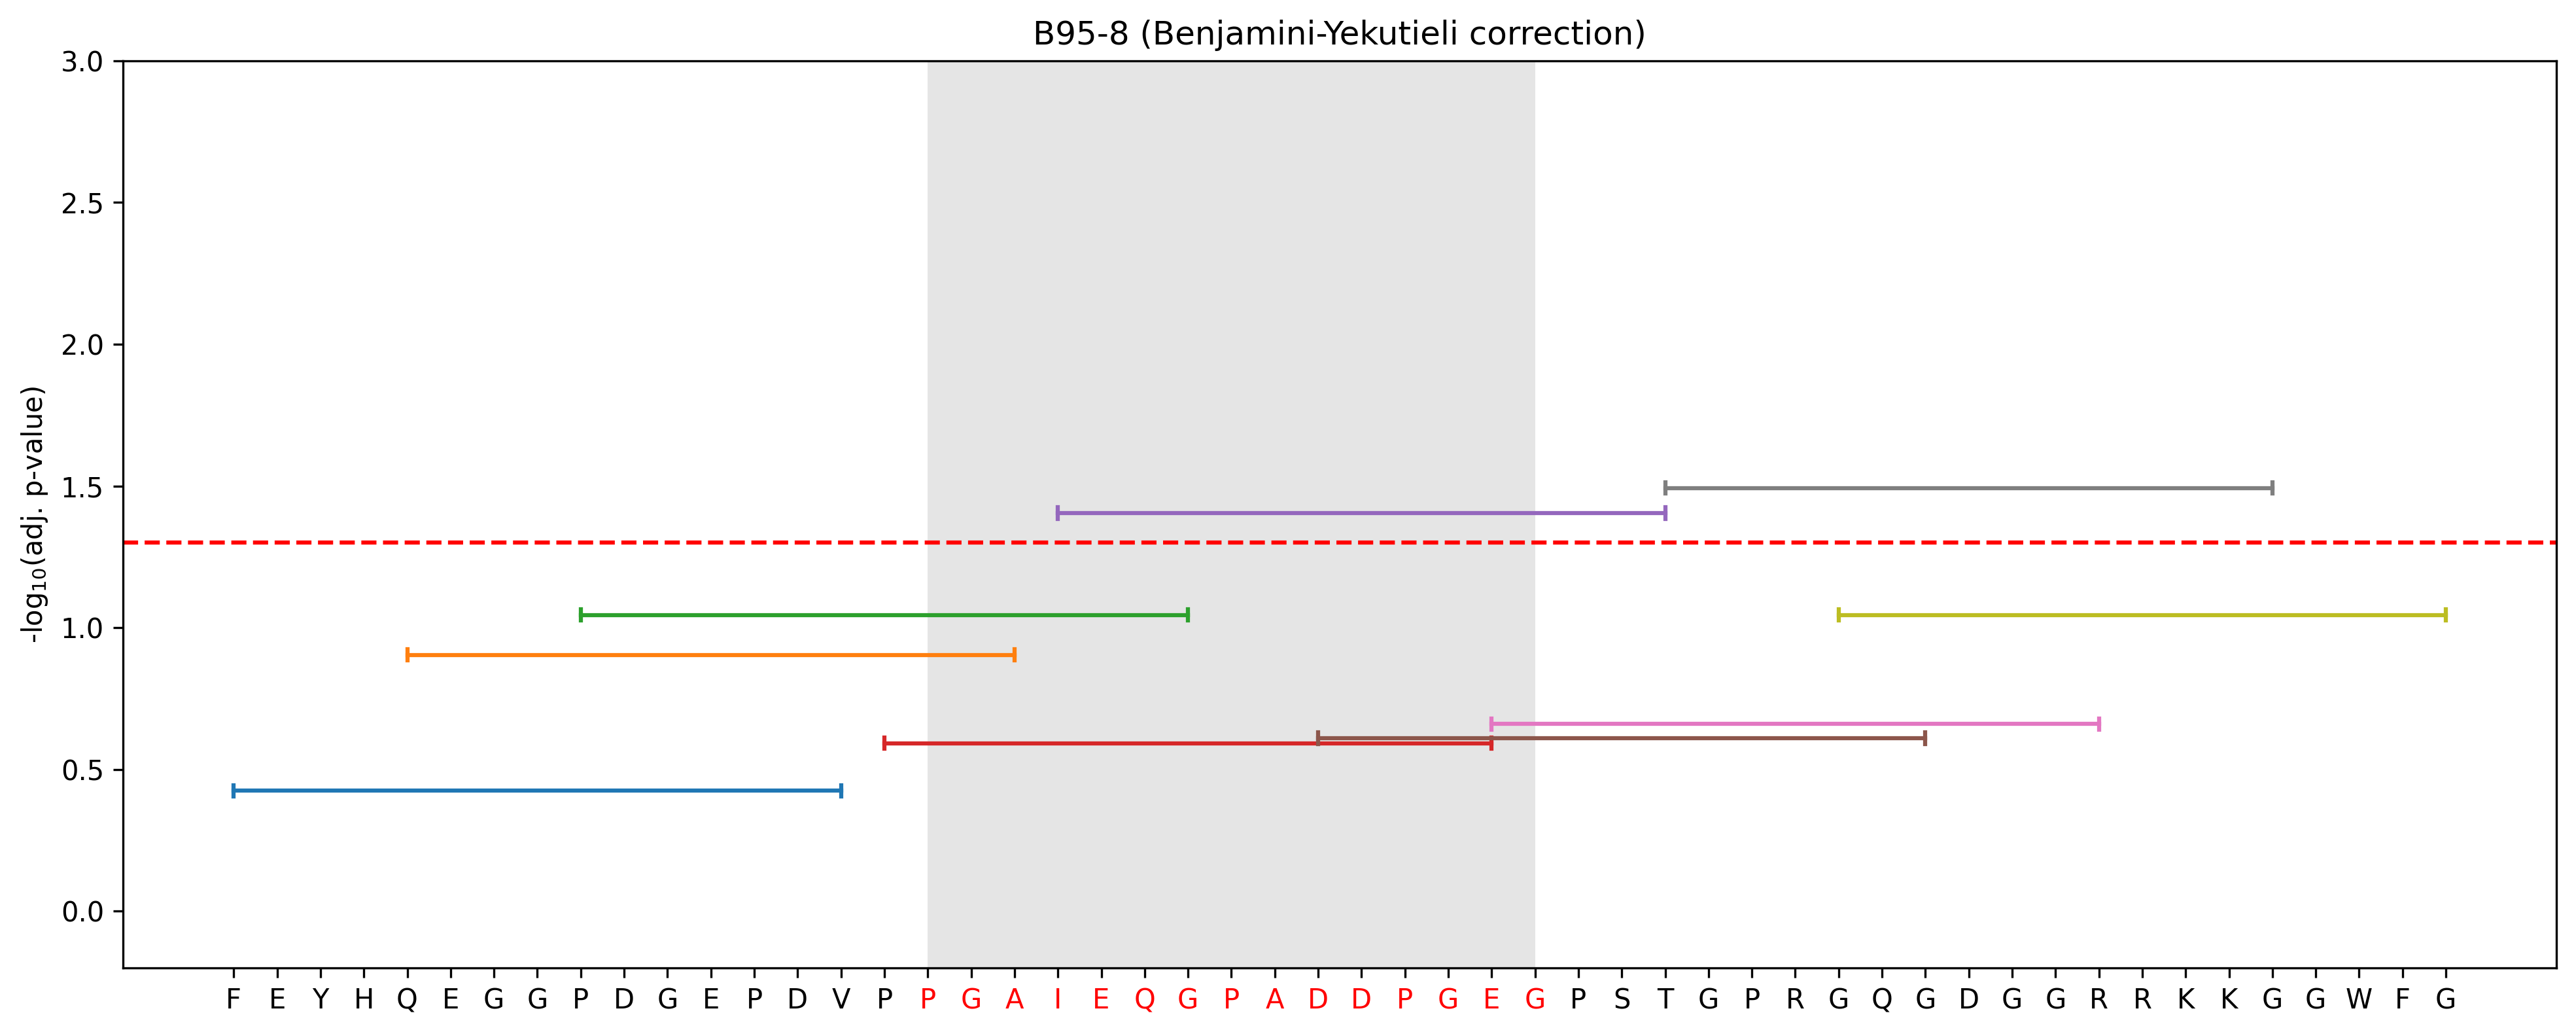

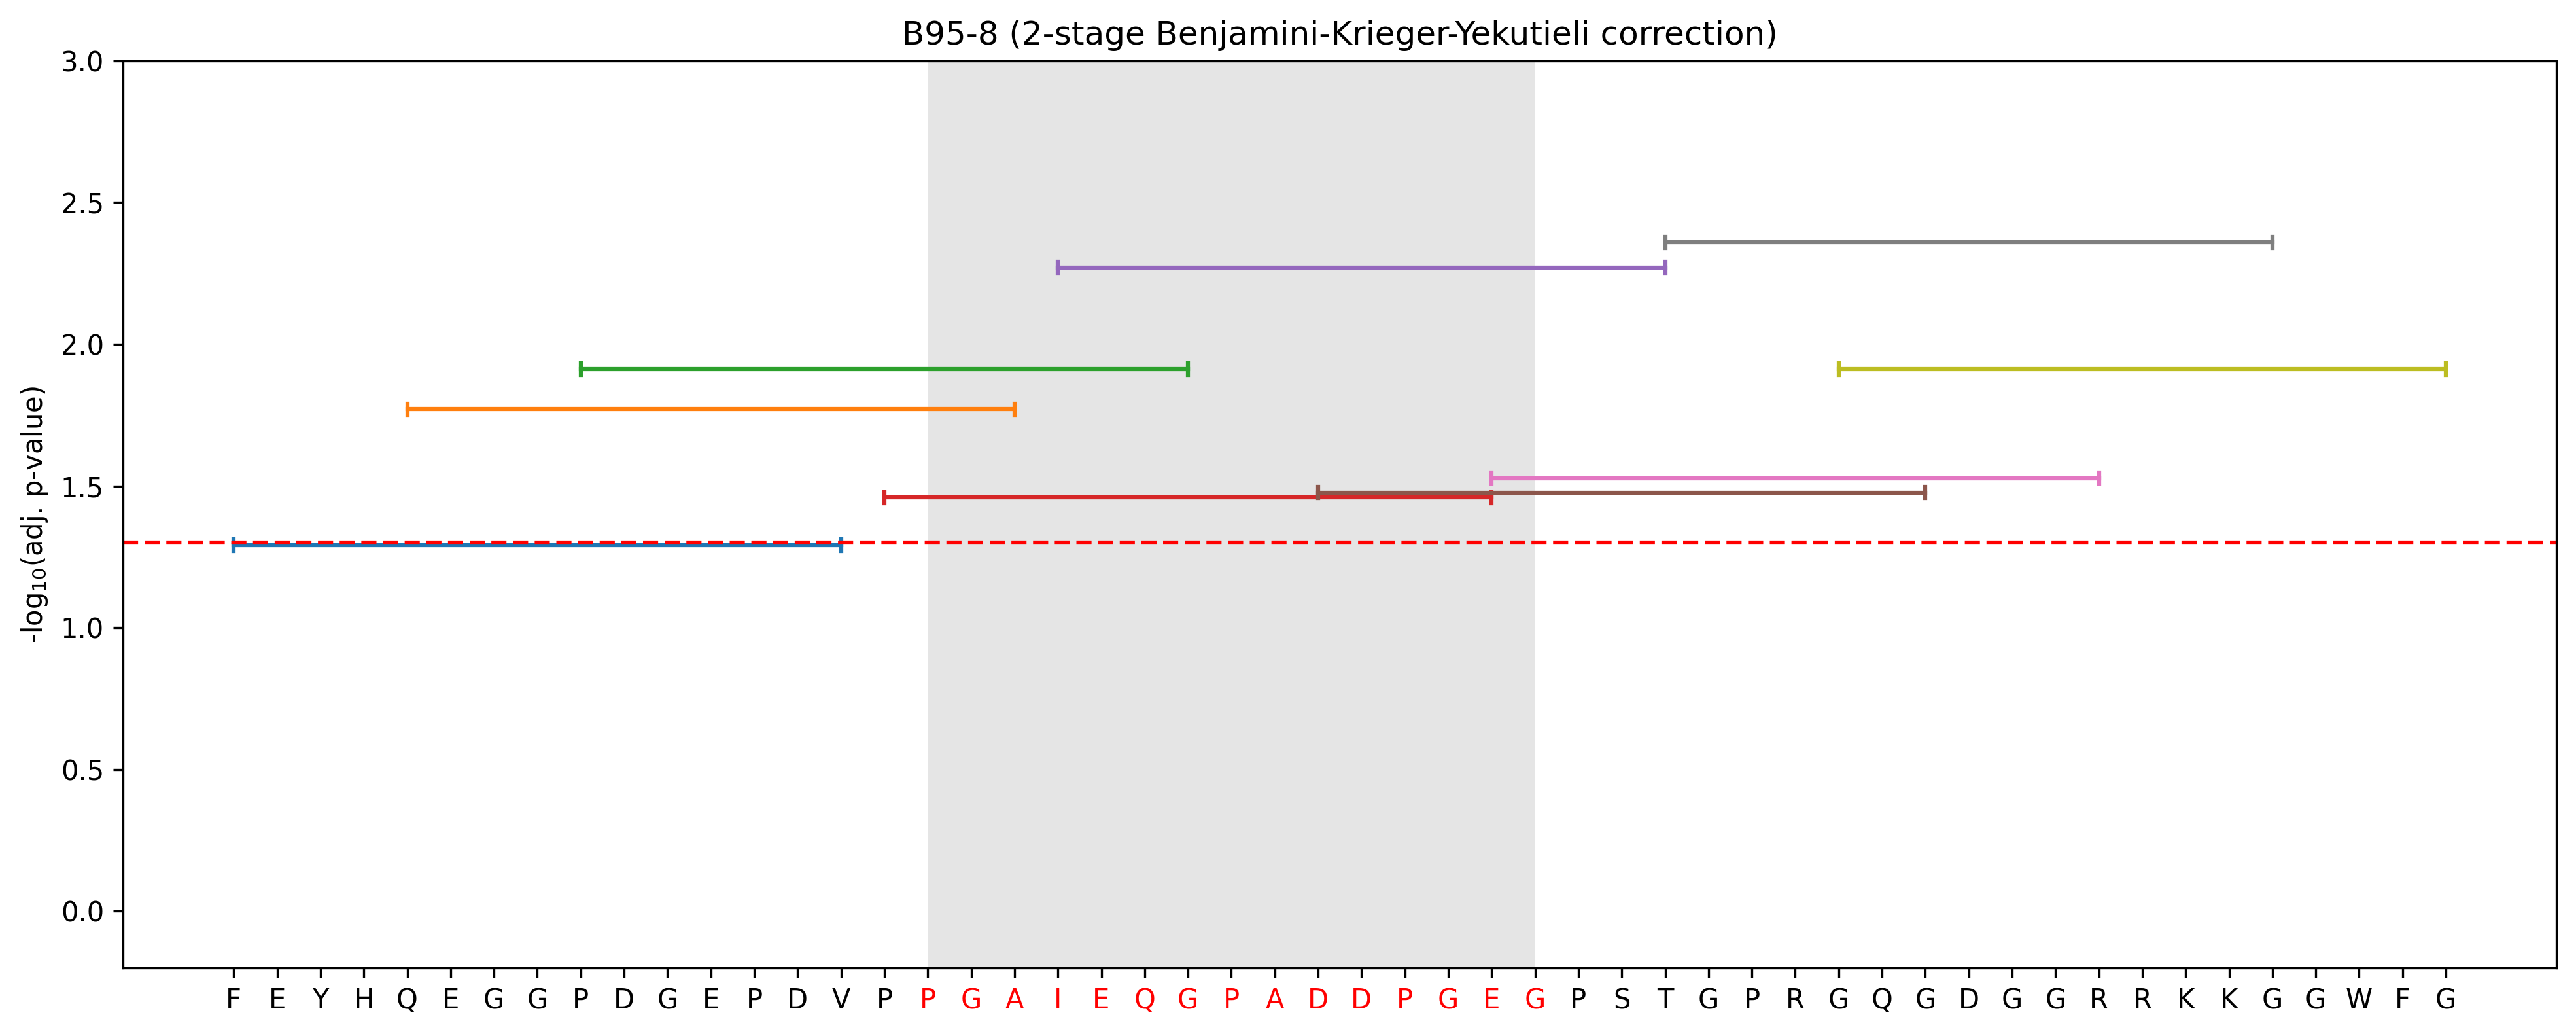

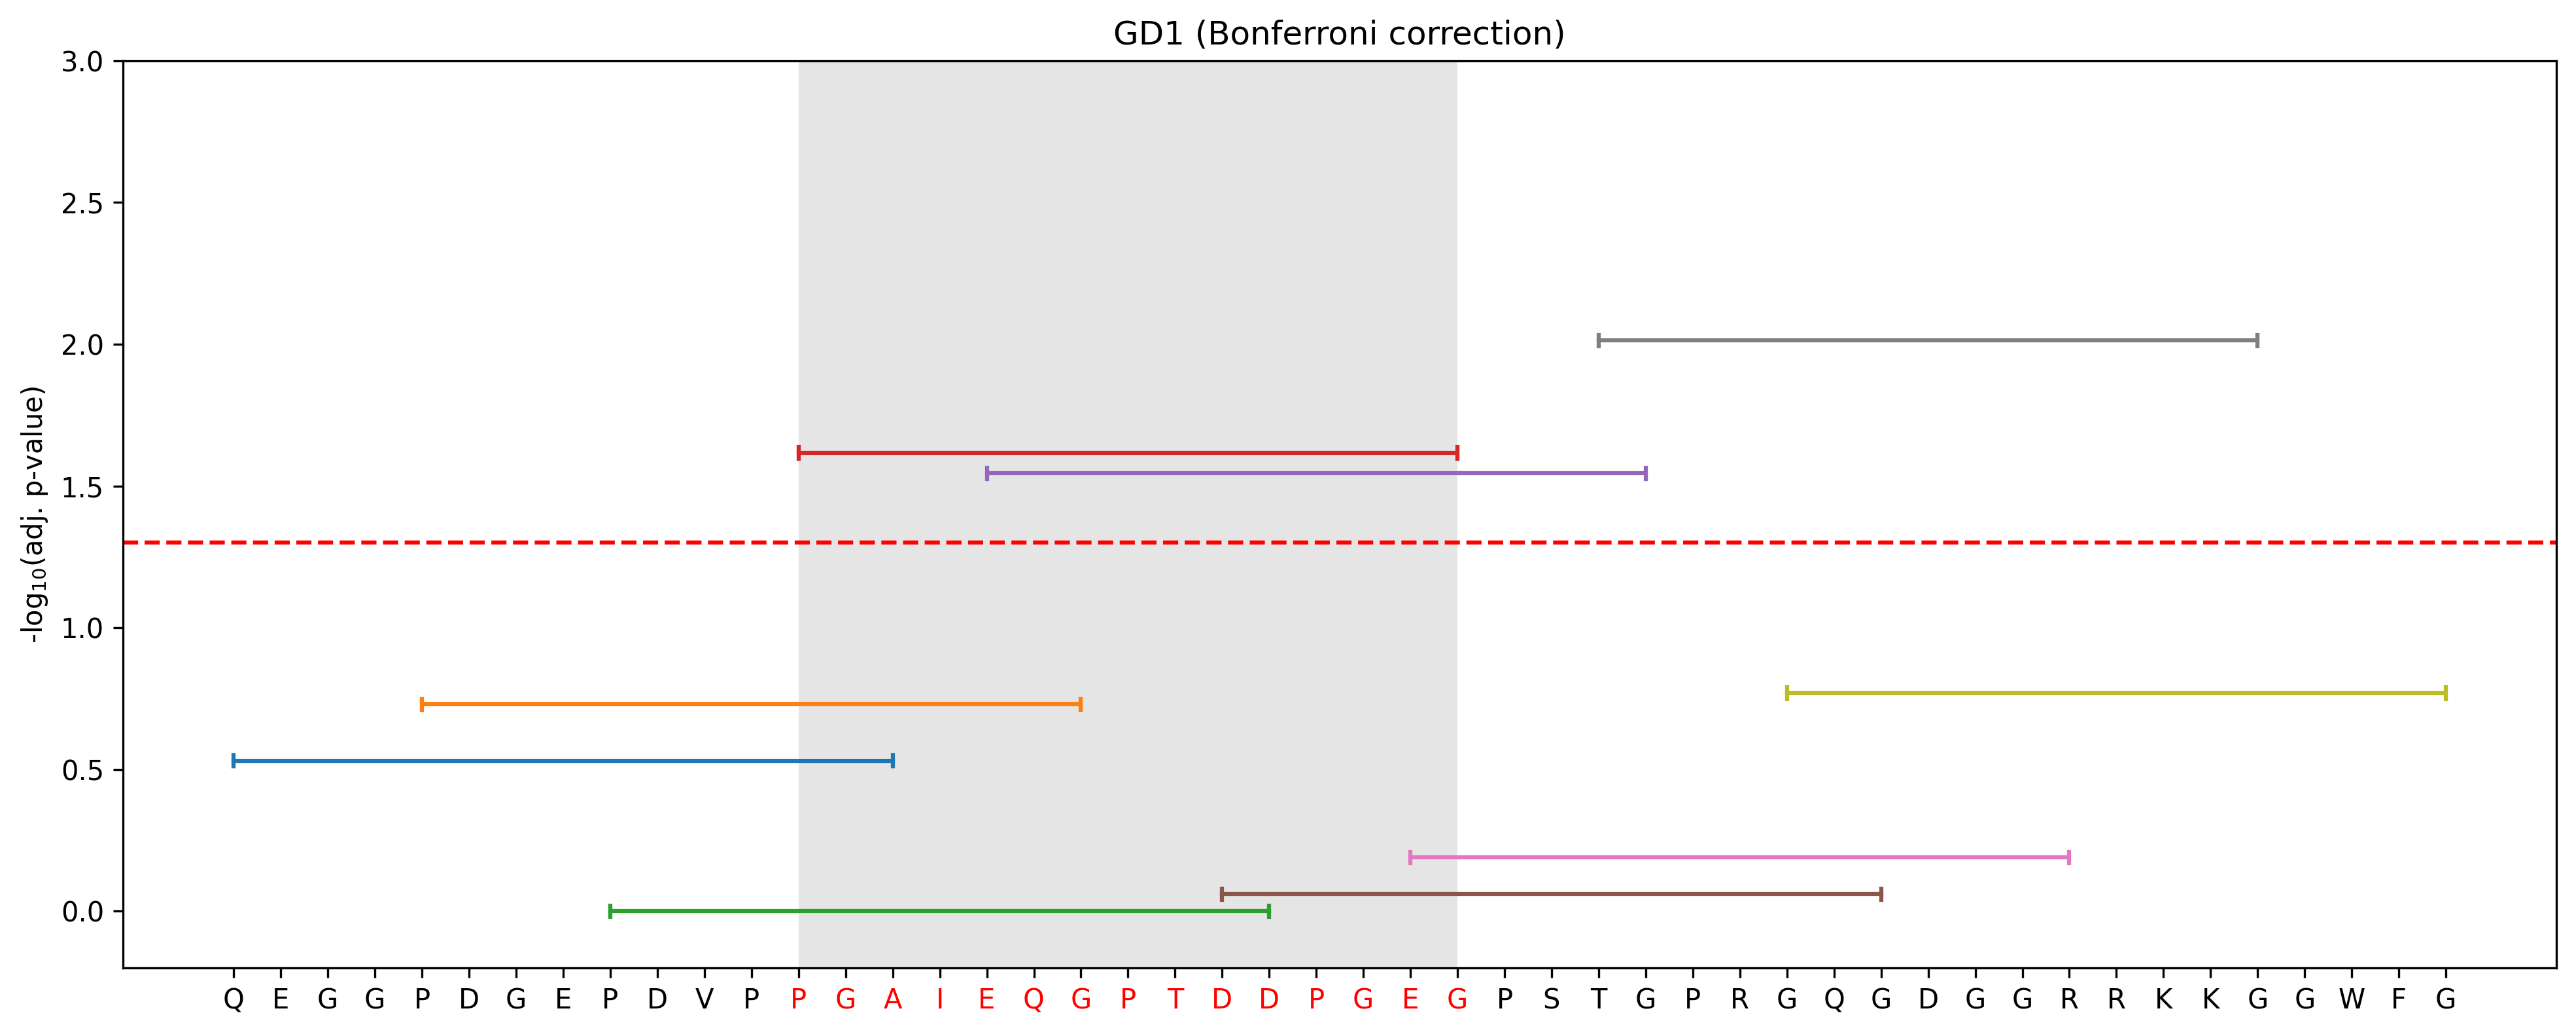

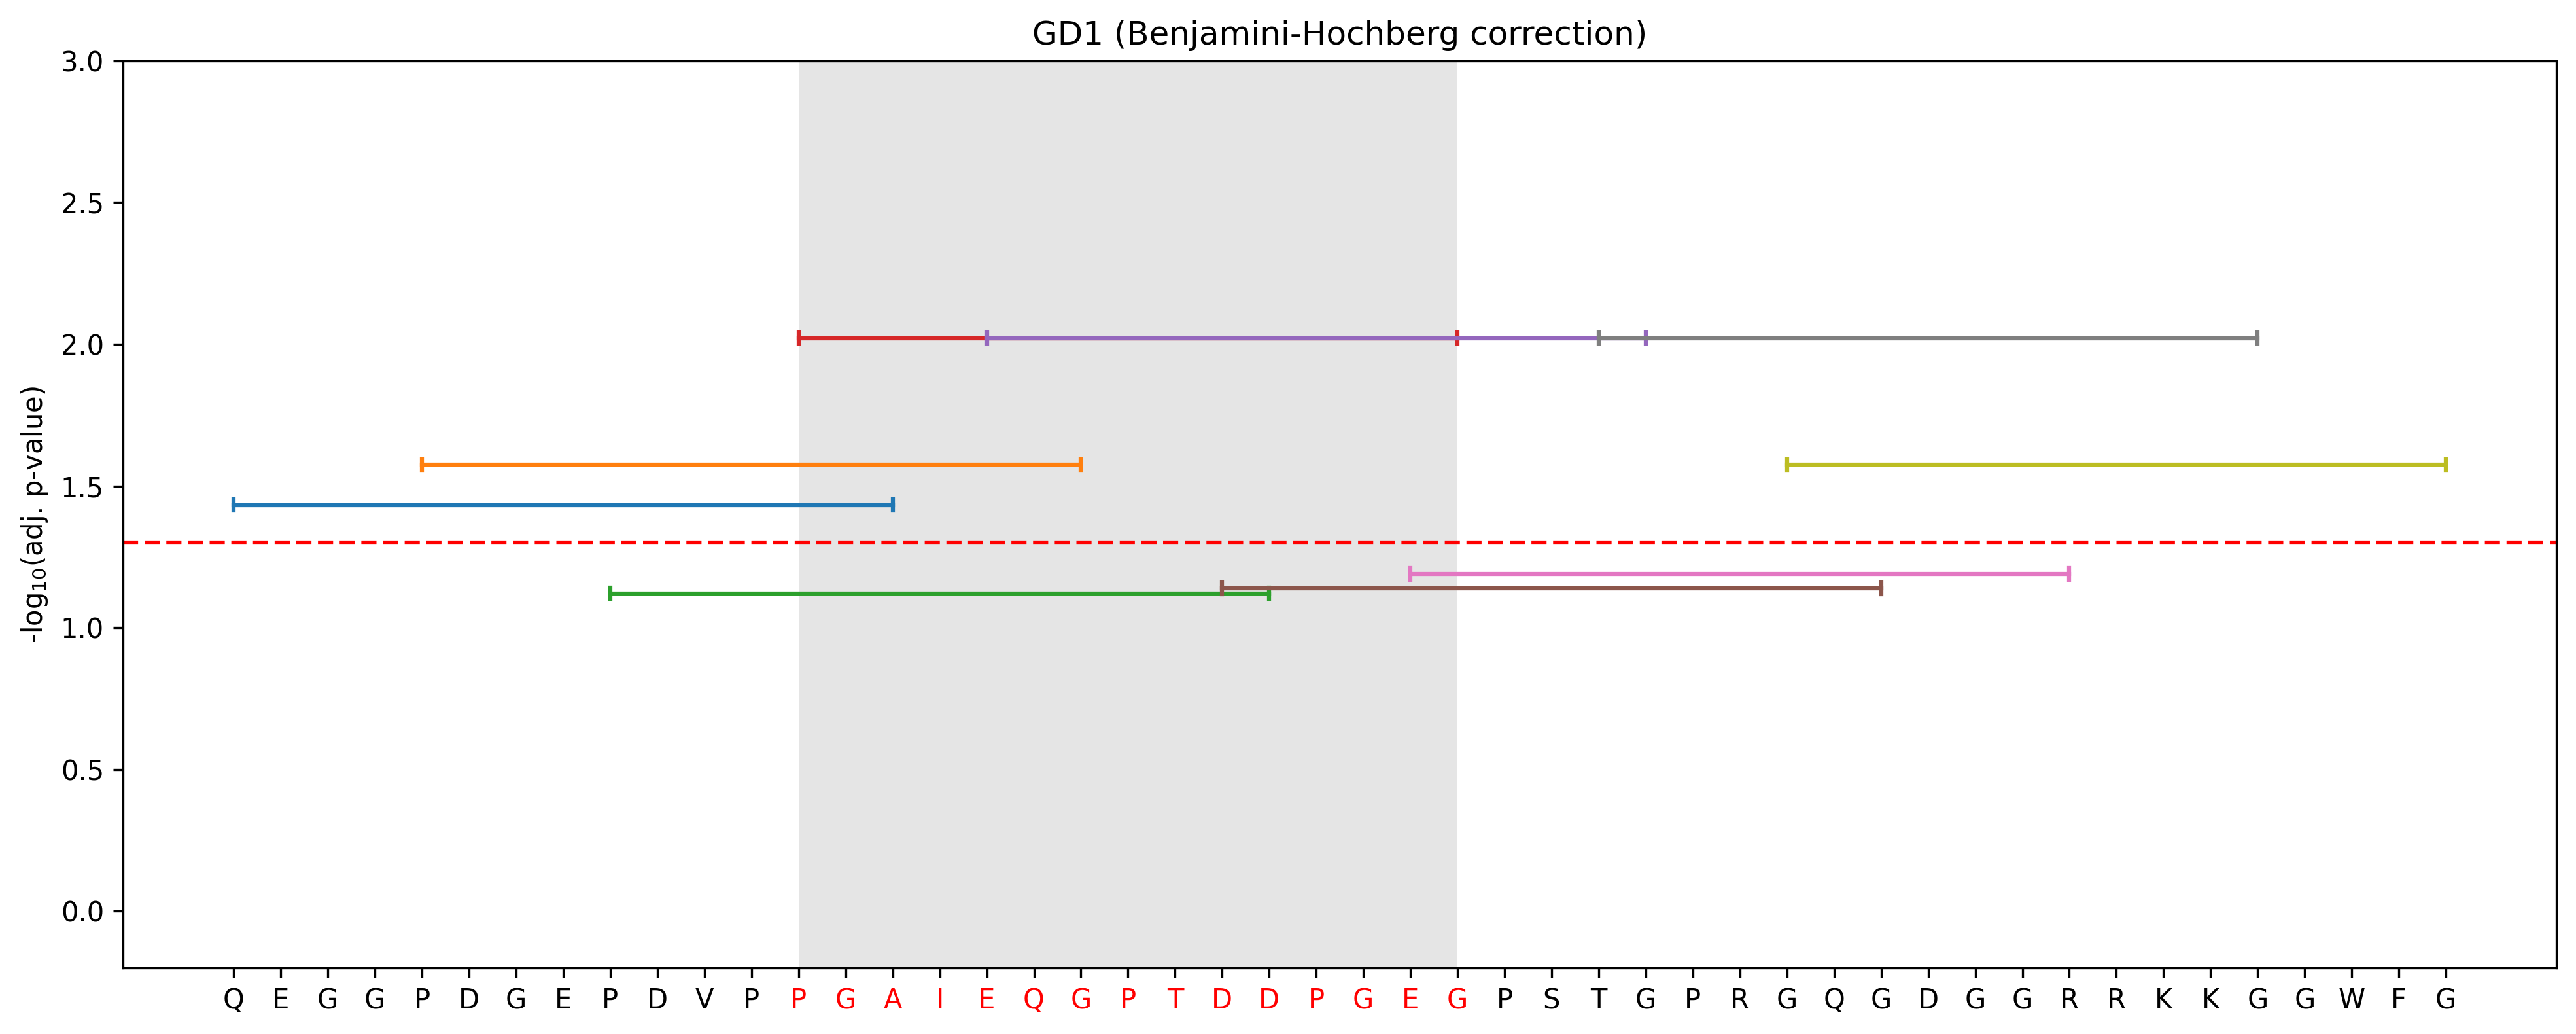

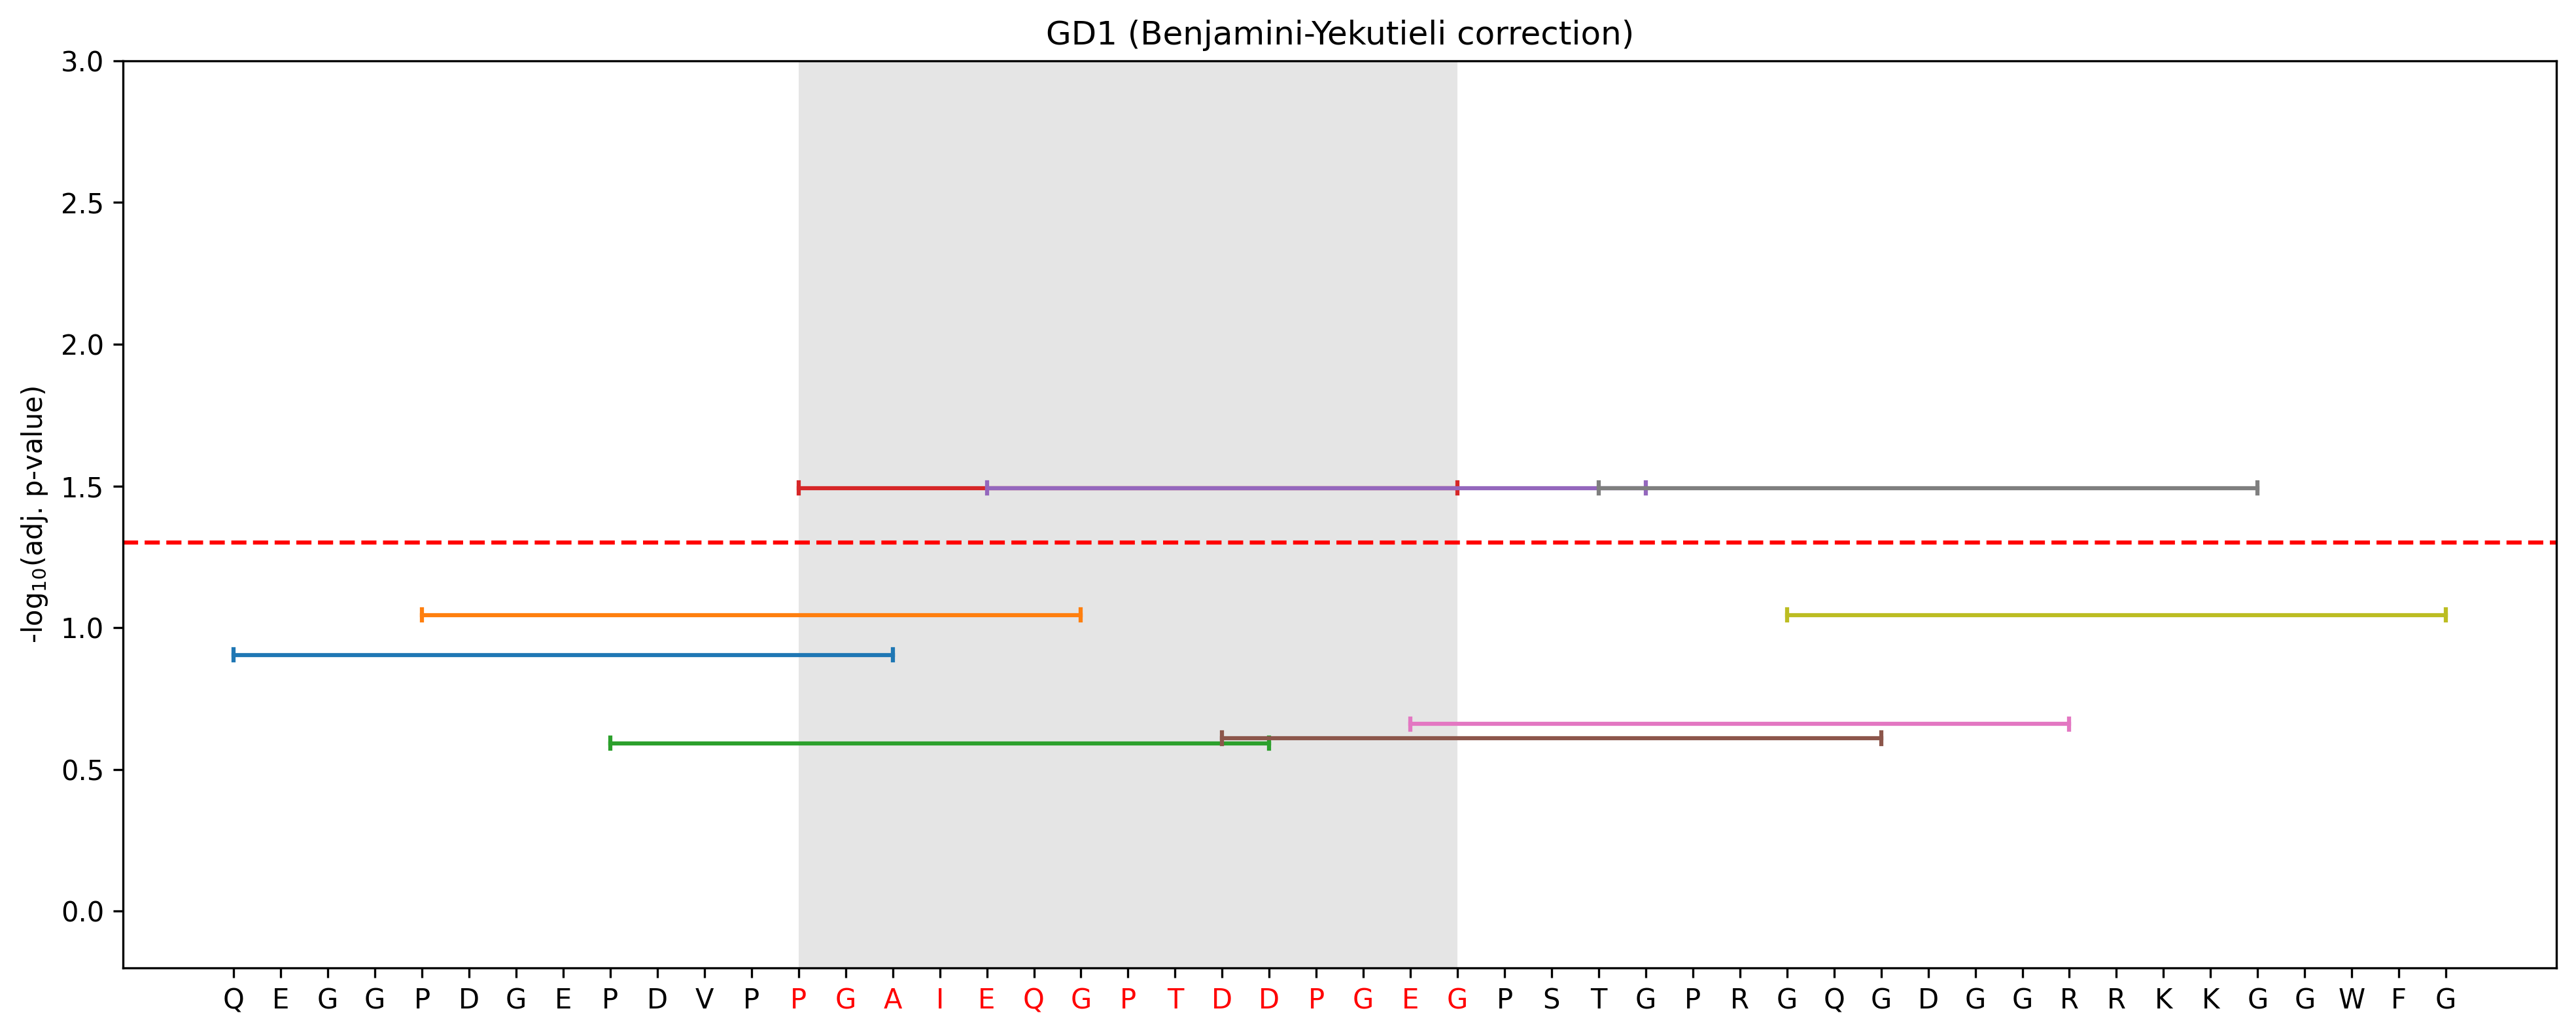

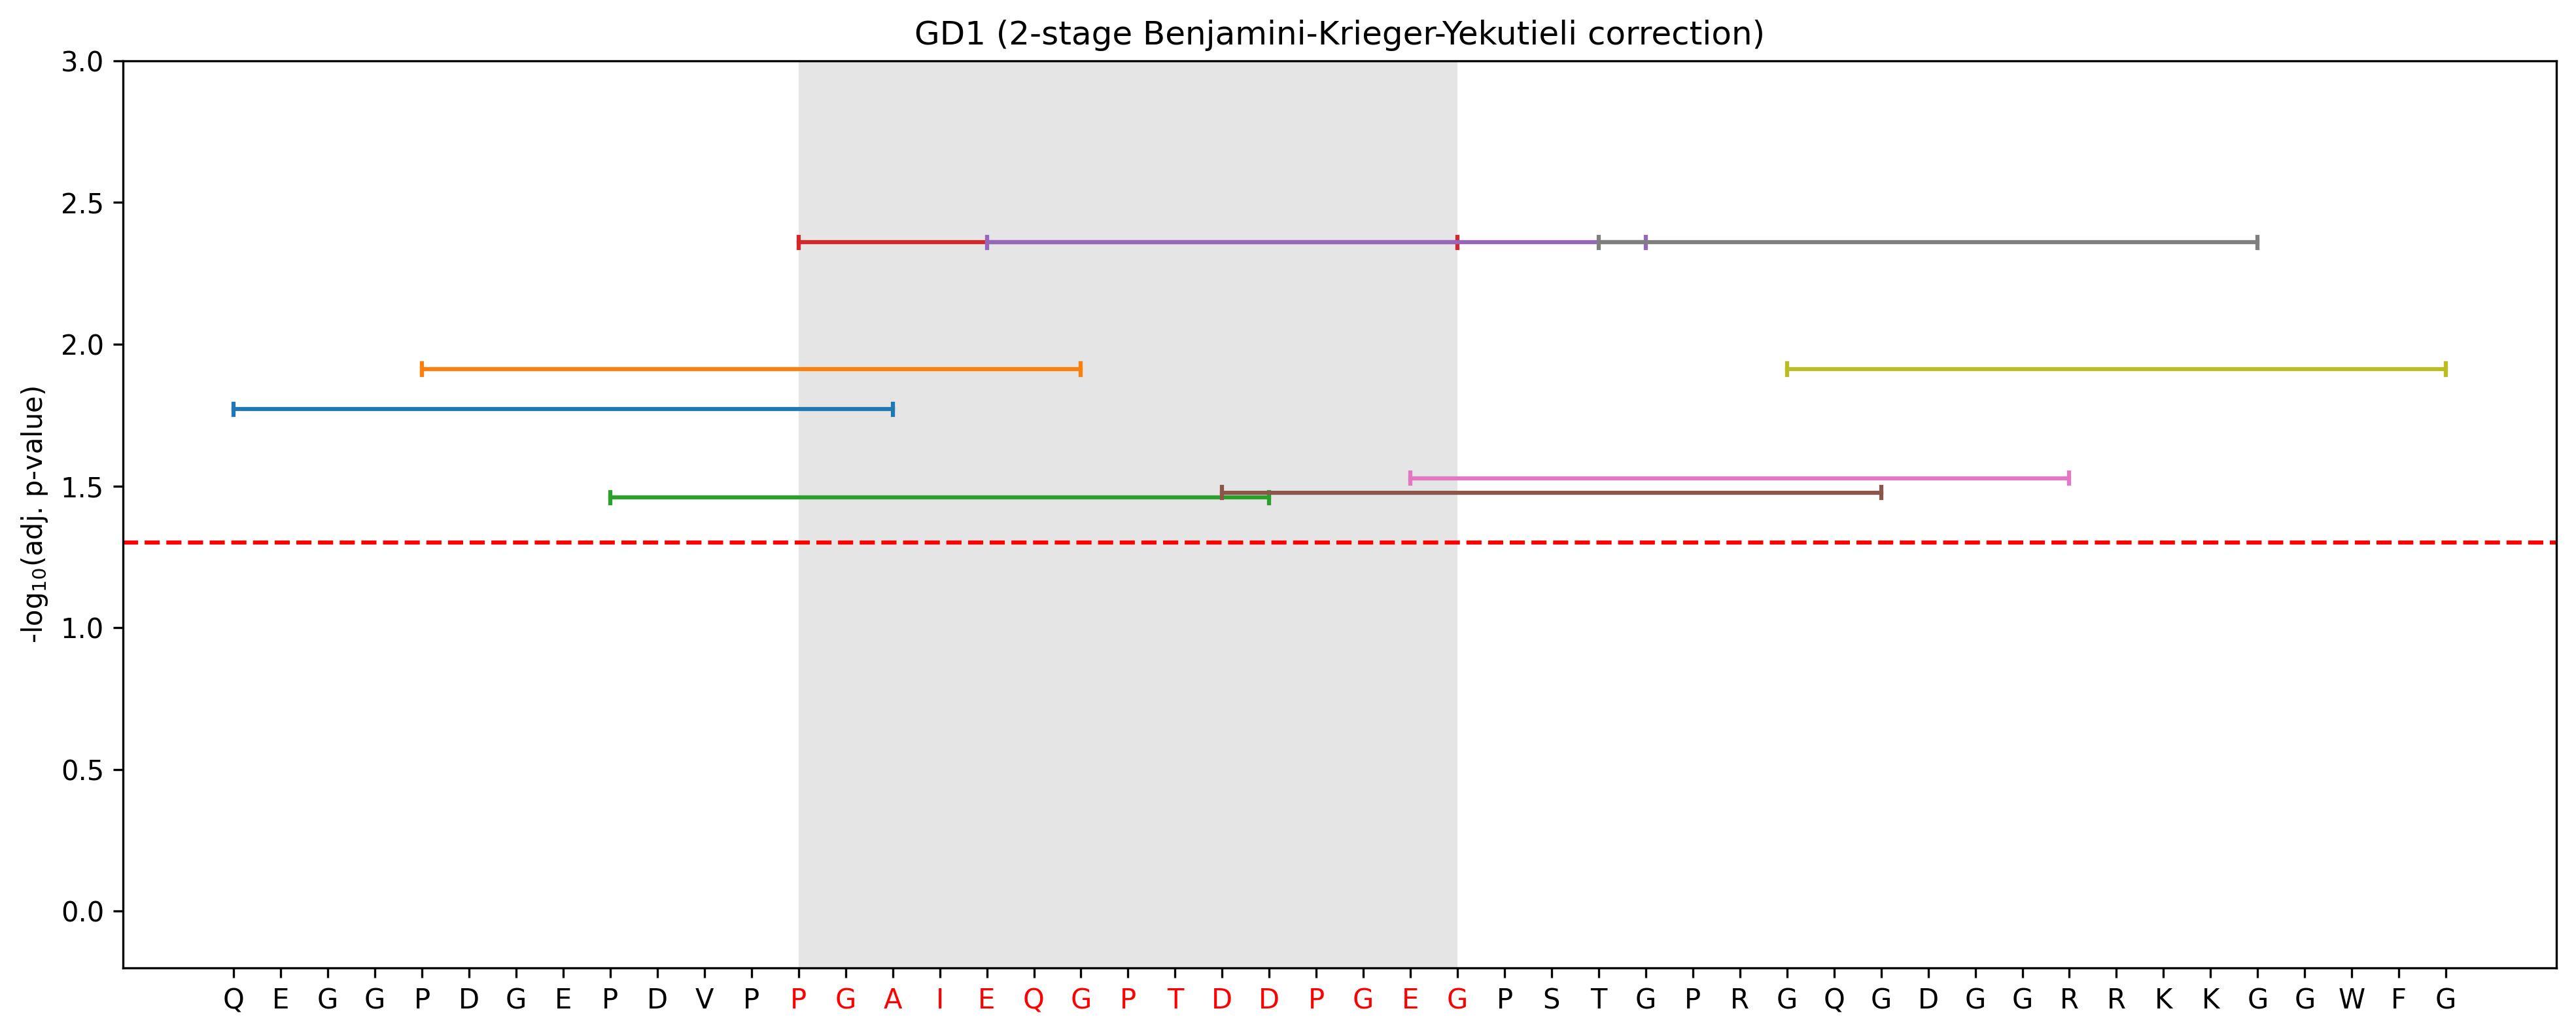

In [25]:
for j in range(len(strains)):
    for i in range(len(correction_types)):
        plot_correction(smr.groups, adj_p_values[i], correction_types[i], strains[j], strain_seqs[j], strain_stops[j], strain_targets[j])